# **Import Library**

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from imblearn.over_sampling import SMOTE

# **Load Data**

In [ ]:
data = pd.read_csv("train.csv")

<ipython-input-4-8d21486d662e>:1: DtypeWarning: Columns (26) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("train.csv")


In [ ]:
data

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS_0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,_,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,High_spent_Small_value_payments,312.49408867943663,Good
1,0x1603,CUS_0xd40,February,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,Low_spent_Large_value_payments,284.62916249607184,Good
2,0x1604,CUS_0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,Low_spent_Medium_value_payments,331.2098628537912,Good
3,0x1605,CUS_0xd40,April,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,Low_spent_Small_value_payments,223.45130972736786,Good
4,0x1606,CUS_0xd40,May,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,High_spent_Medium_value_payments,341.48923103222177,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,0x25fe9,CUS_0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,High_spent_Large_value_payments,479.866228,Poor
99996,0x25fea,CUS_0x942c,May,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,_,502.38,40.565631,31 Years and 7 Months,No,35.104023,54.18595028760385,High_spent_Medium_value_payments,496.65161,Poor
99997,0x25feb,CUS_0x942c,June,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,41.255522,31 Years and 8 Months,No,35.104023,24.02847744864441,High_spent_Large_value_payments,516.809083,Poor
99998,0x25fec,CUS_0x942c,July,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,Good,502.38,33.638208,31 Years and 9 Months,No,35.104023,251.67258219721603,Low_spent_Large_value_payments,319.164979,Standard


In [ ]:
data.shape

(100000, 28)

# **EDA: Exploratory Data Analysis**


**Check Missing Value**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 28 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   ID                        100000 non-null  object 
 1   Customer_ID               100000 non-null  object 
 2   Month                     100000 non-null  object 
 3   Name                      90015 non-null   object 
 4   Age                       100000 non-null  object 
 5   SSN                       100000 non-null  object 
 6   Occupation                100000 non-null  object 
 7   Annual_Income             100000 non-null  object 
 8   Monthly_Inhand_Salary     84998 non-null   float64
 9   Num_Bank_Accounts         100000 non-null  int64  
 10  Num_Credit_Card           100000 non-null  int64  
 11  Interest_Rate             100000 non-null  int64  
 12  Num_of_Loan               100000 non-null  object 
 13  Type_of_Loan              88592 non-null   ob

**Check Duplicated Data**

In [ ]:
data.duplicated().sum()

0

**Check Description Data**

In [ ]:
data.describe()

,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Delay_from_due_date,Num_Credit_Inquiries,Credit_Utilization_Ratio,Total_EMI_per_month
count,84998.000000,100000.000000,100000.00000,100000.000000,100000.000000,98035.000000,100000.000000,100000.000000
mean,4194.170850,17.091280,22.47443,72.466040,21.068780,27.754251,32.285173,1403.118217
std,3183.686167,117.404834,129.05741,466.422621,14.860104,193.177339,5.116875,8306.041270
min,303.645417,-1.000000,0.00000,1.000000,-5.000000,0.000000,20.000000,0.000000
25%,1625.568229,3.000000,4.00000,8.000000,10.000000,3.000000,28.052567,30.306660
50%,3093.745000,6.000000,5.00000,13.000000,18.000000,6.000000,32.305784,69.249473
75%,5957.448333,7.000000,7.00000,20.000000,28.000000,9.000000,36.496663,161.224249
max,15204.633333,1798.000000,1499.00000,5797.000000,67.000000,2597.000000,50.000000,82331.000000


**Check Data Type**

In [ ]:
data.dtypes

ID                           object
Customer_ID                  object
Month                        object
Name                         object
Age                          object
SSN                          object
Occupation                   object
Annual_Income                object
Monthly_Inhand_Salary       float64
Num_Bank_Accounts             int64
Num_Credit_Card               int64
Interest_Rate                 int64
Num_of_Loan                  object
Type_of_Loan                 object
Delay_from_due_date           int64
Num_of_Delayed_Payment       object
Changed_Credit_Limit         object
Num_Credit_Inquiries        float64
Credit_Mix                   object
Outstanding_Debt             object
Credit_Utilization_Ratio    float64
Credit_History_Age           object
Payment_of_Min_Amount        object
Total_EMI_per_month         float64
Amount_invested_monthly      object
Payment_Behaviour            object
Monthly_Balance              object
Credit_Score                

**Histogram**

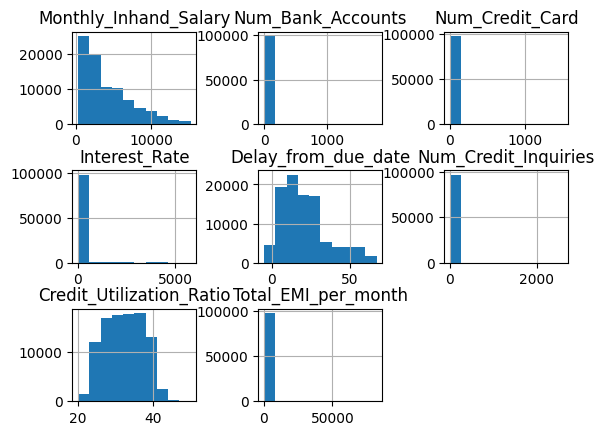

In [ ]:
data.hist()
plt.subplots_adjust(hspace=0.5, wspace=0.5)
plt.rcParams['figure.figsize'] = [16, 9]
plt.show()

In [ ]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    53174
Poor        28998
Good        17828
Name: count, dtype: int64

Berdasarkan visualisasi data, kita bisa simpulkan:
1. Ada 28 kolom dimana masih ada beberapa fitur yang memiliki missing value dan harus kita handle
2. Kemudian ada juga data yang tipenya kategorikal dan harus kita encode menjadi numerik supaya bisa diproses
3. Tidak ada data yang terduplikasi sehingga kita bisa lewatkan tahapan drop duplikasi
4. Ada ID yang bisa kita drop karena terlalu unik dan tidak terlalu relevan
5. Karena skalanya beragam nanti bisa kita lakukan normalisasi
6. Kita juga akan coba hapus constant value dan outlier jika ada

# **Data Preprocessing**

## **Data Cleaning**

In [ ]:
data = data.replace("_", "", regex=True)
data[data.eq('').any(axis=1)]

,ID,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,0x1602,CUS0xd40,January,Aaron Maashoh,23,821-00-0265,Scientist,19114.12,1824.843333,3,...,,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good
2,0x1604,CUS0xd40,March,Aaron Maashoh,-500,821-00-0265,Scientist,19114.12,NaN,3,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good
8,0x160e,CUS0x21b1,January,Rick Rothackerj,28,004-07-5839,,34847.84,3037.986667,2,...,Good,605.03,24.464031,26 Years and 7 Months,No,18.816215,104.291825168246,LowspentSmallvaluepayments,470.69062692529184,Standard
10,0x1610,CUS0x21b1,March,Rick Rothackerj,28,004-07-5839,Teacher,34847.84,3037.986667,2,...,,605.03,33.224951,26 Years and 9 Months,No,18.816215,58.51597569589465,HighspentLargevaluepayments,466.46647639764313,Standard
16,0x161a,CUS0x2dbc,January,Langep,34,486-85-3974,,143162.64,12187.220000,1,...,Good,1303.01,28.616735,17 Years and 9 Months,No,246.992319,168.413702679309,!@9#%8,1043.3159778669492,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99989,0x25fdf,CUS0x8600,June,Sarah McBridec,28,031-35-0942,,20002.88,1929.906667,10,...,Bad,3571.7,33.359987,6 Years and 1 Months,Yes,60.964772,74.36660309585342,!@9#%8,307.659291,Standard
99992,0x25fe6,CUS0x942c,January,Nicks,24,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,32.991333,31 Years and 3 Months,No,35.104023,401.1964806036356,LowspentSmallvaluepayments,189.64108,Poor
99994,0x25fe8,CUS0x942c,March,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,39.323569,31 Years and 5 Months,No,35.104023,140.58140274528395,HighspentMediumvaluepayments,410.256158,Poor
99995,0x25fe9,CUS0x942c,April,Nicks,25,078-73-5990,Mechanic,39628.99,3359.415833,4,...,,502.38,34.663572,31 Years and 6 Months,No,35.104023,60.97133255718485,HighspentLargevaluepayments,479.866228,Poor


In [ ]:
rows_with_empty_values = data[data.eq('').any(axis=1)]

# Fill empty values with np.nan in selected rows
data.loc[rows_with_empty_values.index] = data.loc[rows_with_empty_values.index].replace('', np.nan)

Disini kita coba ubah jadi missing value untuk datanya yang _ supaya enak kita proses nantinya

### **Drop Unique Features**

Kita coba hapus yang identitas customernya karena tidak terlalu relevan, takutnya malah bikin modelnya jadi jelek performanya.

In [ ]:
data = data.drop(['ID','Customer_ID','Name','SSN', 'Type_of_Loan', 'Changed_Credit_Limit', 'Monthly_Inhand_Salary'], axis = 1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Month                     100000 non-null  object 
 1   Age                       100000 non-null  object 
 2   Occupation                92938 non-null   object 
 3   Annual_Income             100000 non-null  object 
 4   Num_Bank_Accounts         100000 non-null  int64  
 5   Num_Credit_Card           100000 non-null  int64  
 6   Interest_Rate             100000 non-null  int64  
 7   Num_of_Loan               100000 non-null  object 
 8   Delay_from_due_date       100000 non-null  int64  
 9   Num_of_Delayed_Payment    92998 non-null   object 
 10  Num_Credit_Inquiries      98035 non-null   float64
 11  Credit_Mix                79805 non-null   object 
 12  Outstanding_Debt          100000 non-null  object 
 13  Credit_Utilization_Ratio  100000 non-null  fl

### **Check each features**

**Month**

In [ ]:
dict = {"January" : 1,"February" : 2,"March" : 3,"April" : 4,"May" : 5,"June" : 6,"July" : 7,"August" : 8}
data["Month"] = data["Month"].map(dict)
data.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,1,23,Scientist,19114.12,3,4,3,4,3,7,...,NaN,809.98,26.822620,22 Years and 1 Months,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good
1,2,23,Scientist,19114.12,3,4,3,4,-1,NaN,...,Good,809.98,31.944960,NaN,No,49.574949,118.28022162236736,LowspentLargevaluepayments,284.62916249607184,Good
2,3,-500,Scientist,19114.12,3,4,3,4,3,7,...,Good,809.98,28.609352,22 Years and 3 Months,No,49.574949,81.699521264648,LowspentMediumvaluepayments,331.2098628537912,Good
3,4,23,Scientist,19114.12,3,4,3,4,5,4,...,Good,809.98,31.377862,22 Years and 4 Months,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,Good
4,5,23,Scientist,19114.12,3,4,3,4,6,NaN,...,Good,809.98,24.797347,22 Years and 5 Months,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,Good


**Age**

In [ ]:
data['Age'].value_counts().head(20)

Age
38    2994
28    2968
31    2955
26    2945
32    2884
36    2868
35    2866
25    2861
27    2859
39    2846
34    2837
44    2824
19    2793
22    2785
41    2785
20    2744
37    2742
29    2735
43    2734
30    2727
Name: count, dtype: int64

Karena ini datanya ada yang gak make sense, kita coba hapus yang lebih dari 100 dan kurang dari 0. Karena tidak mungkin age bernilai minus dan jarang sekali lebih dari 100

In [ ]:
import re

def non_numeric_values(data, column_name):
    # Define a regular expression pattern to match numeric characters
    pattern = r'\D+'

    # Find non-numeric values using regular expression
    non_numeric_values = data[column_name].astype(str).str.findall(pattern)

    # Flatten the list of lists
    non_numeric_values = [item for sublist in non_numeric_values for item in sublist]

    # Use set to ensure uniqueness
    unique_non_numeric_values = set(non_numeric_values)

    return unique_non_numeric_values

unique_non_numeric = non_numeric_values(data, 'Age')
print(unique_non_numeric)

{'-'}


In [ ]:
data['Age'] = pd.to_numeric(data['Age'], errors='coerce')
data[data['Age'] < 0]['Age'].unique()

array([-500])

In [ ]:
data[data['Age'] > 100]['Age'].unique()

array([7580,  181,  995, ..., 4808, 2263, 1342])

In [ ]:
data.drop(data[data['Age'] > 100].index, inplace = True)
data.drop(data[data['Age'] < 0].index, inplace = True)

Persebaran data age

<Axes: xlabel='Age'>

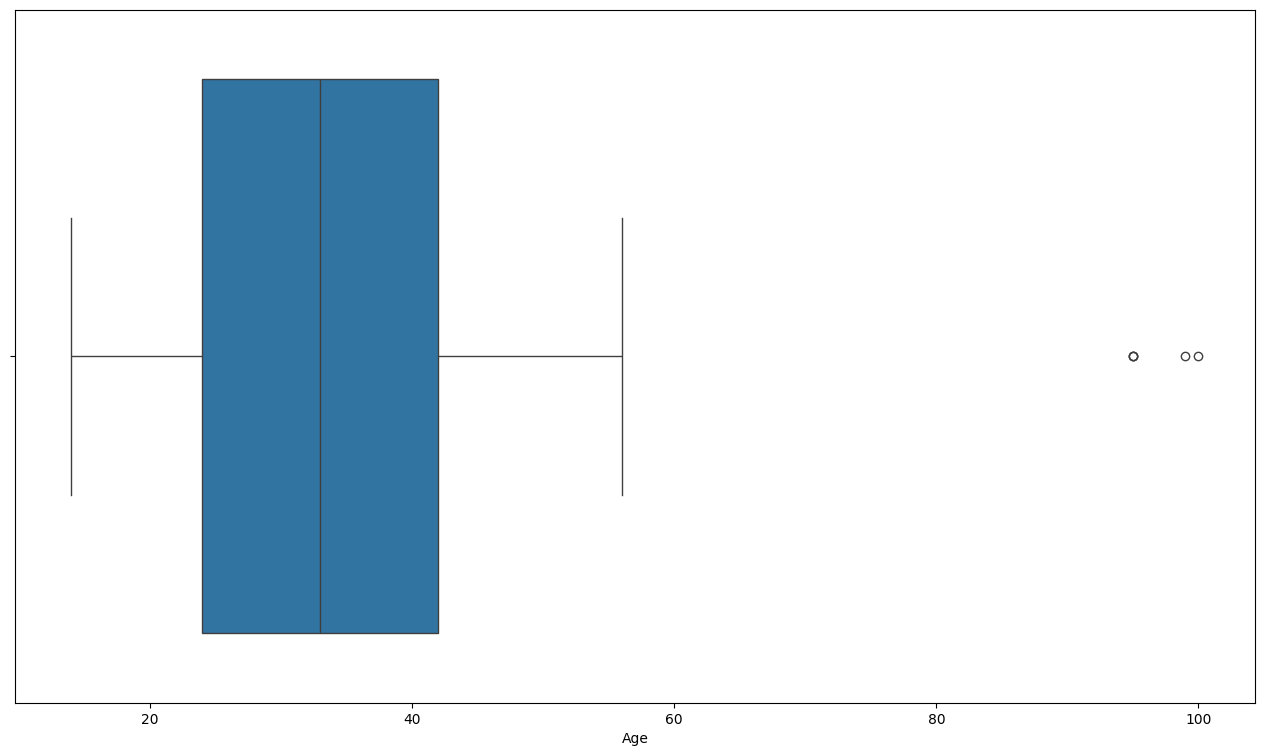

In [ ]:
sns.boxplot(data= data, x= data.Age)

**Occupation**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 97224 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Month                     97224 non-null  int64  
 1   Age                       97224 non-null  int64  
 2   Occupation                90351 non-null  object 
 3   Annual_Income             97224 non-null  object 
 4   Num_Bank_Accounts         97224 non-null  int64  
 5   Num_Credit_Card           97224 non-null  int64  
 6   Interest_Rate             97224 non-null  int64  
 7   Num_of_Loan               97224 non-null  object 
 8   Delay_from_due_date       97224 non-null  int64  
 9   Num_of_Delayed_Payment    90400 non-null  object 
 10  Num_Credit_Inquiries      95318 non-null  float64
 11  Credit_Mix                77591 non-null  object 
 12  Outstanding_Debt          97224 non-null  object 
 13  Credit_Utilization_Ratio  97224 non-null  float64
 14  Credit_Hist

In [ ]:
data['Occupation'].value_counts()

Occupation
Lawyer          6389
Architect       6175
Engineer        6172
Scientist       6113
Accountant      6110
Mechanic        6099
MediaManager    6068
Teacher         6049
Developer       6031
Entrepreneur    6015
Doctor          5916
Journalist      5906
Manager         5807
Musician        5760
Writer          5741
Name: count, dtype: int64

In [ ]:
data['Occupation'].isna().sum()

6873

In [ ]:
data.loc[pd.isna(data['Occupation']), 'Occupation'] = 'Other'

Kita coba yang null kita jadikan other, kita asumsikan dia ada pekerjaan tapi karena gak ada di pilihan, kita buat dia jadi Other

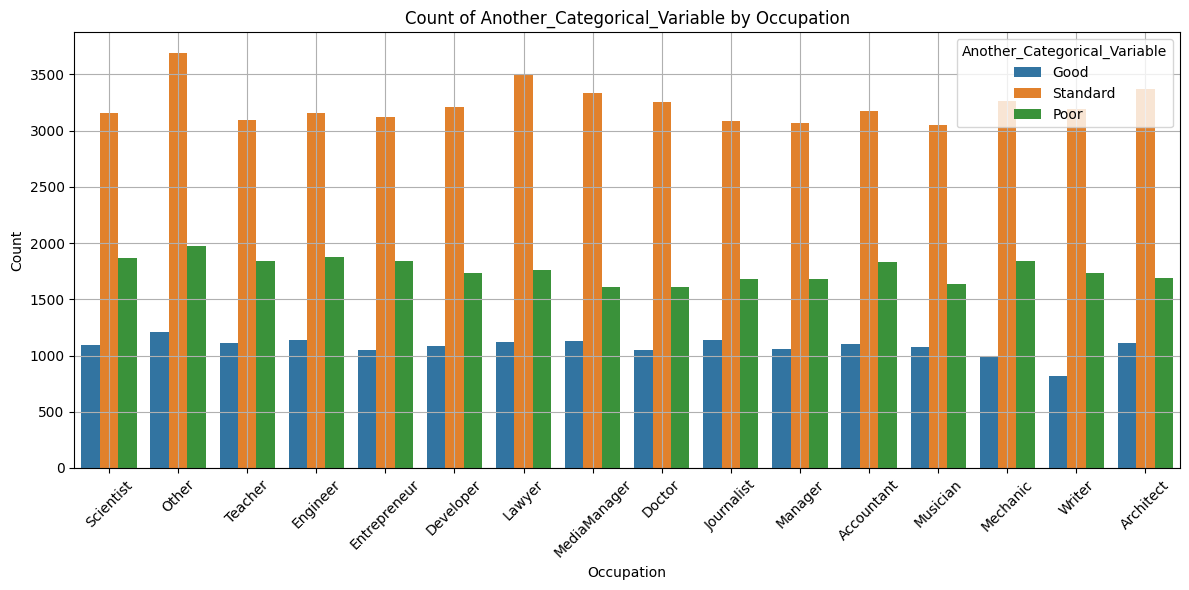

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Occupation', hue='Credit_Score', data=data)
plt.xlabel('Occupation')
plt.ylabel('Count')
plt.title('Count of Another_Categorical_Variable by Occupation')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

**Annual_Income**

In [ ]:
data['Annual_Income'].isna().sum()

0

Data ini sudah aman

**Num_Bank_Accounts**

In [ ]:
non_numeric_values(data, 'Num_Bank_Accounts')

{'-'}

In [ ]:
data[data.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()

21

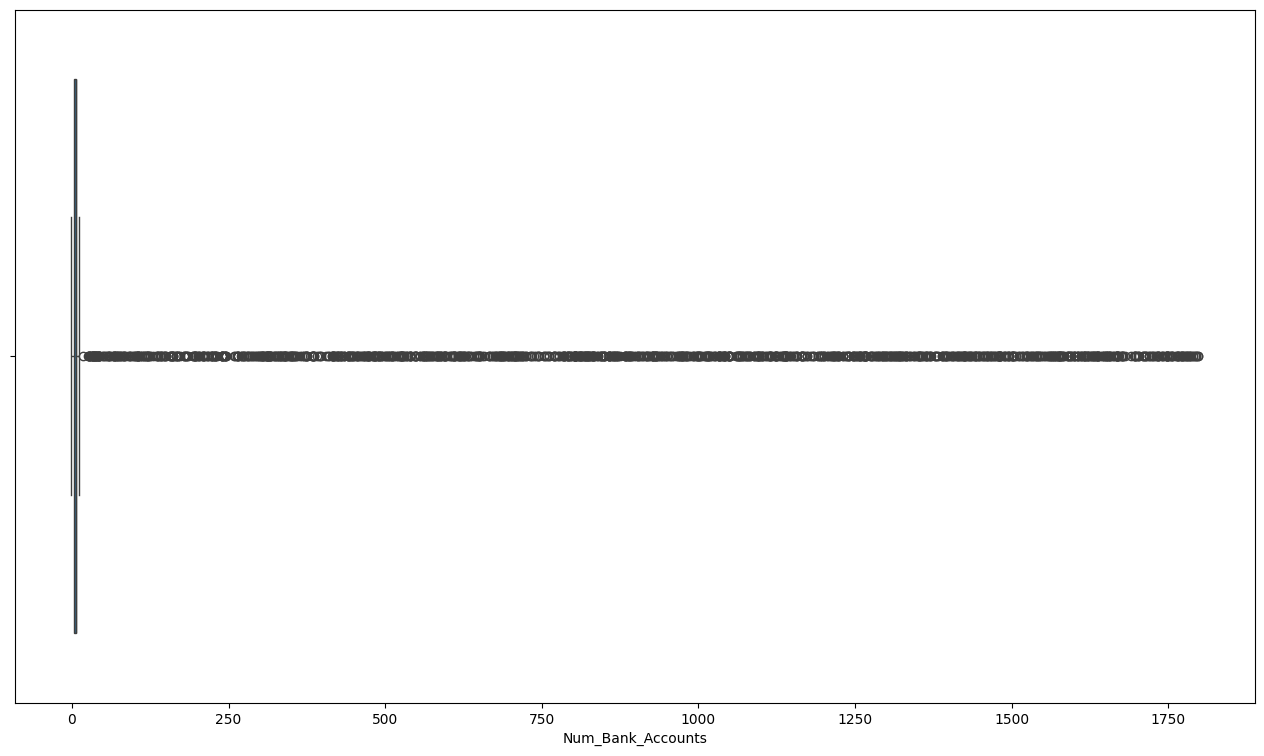

In [ ]:
sns.boxplot(data = data, x = data.Num_Bank_Accounts);

Ini kayaknya perlu dibuang deh outliernya nanti, sisanya datanya itu masih aman dan gak ada yang dibawah 0 atau bernilai minus

**Num_Credit_Card**

In [ ]:
non_numeric_values(data, 'Num_Bank_Accounts')

{'-'}

In [ ]:
data[data.Num_Bank_Accounts < 0]['Num_Bank_Accounts'].count()

21

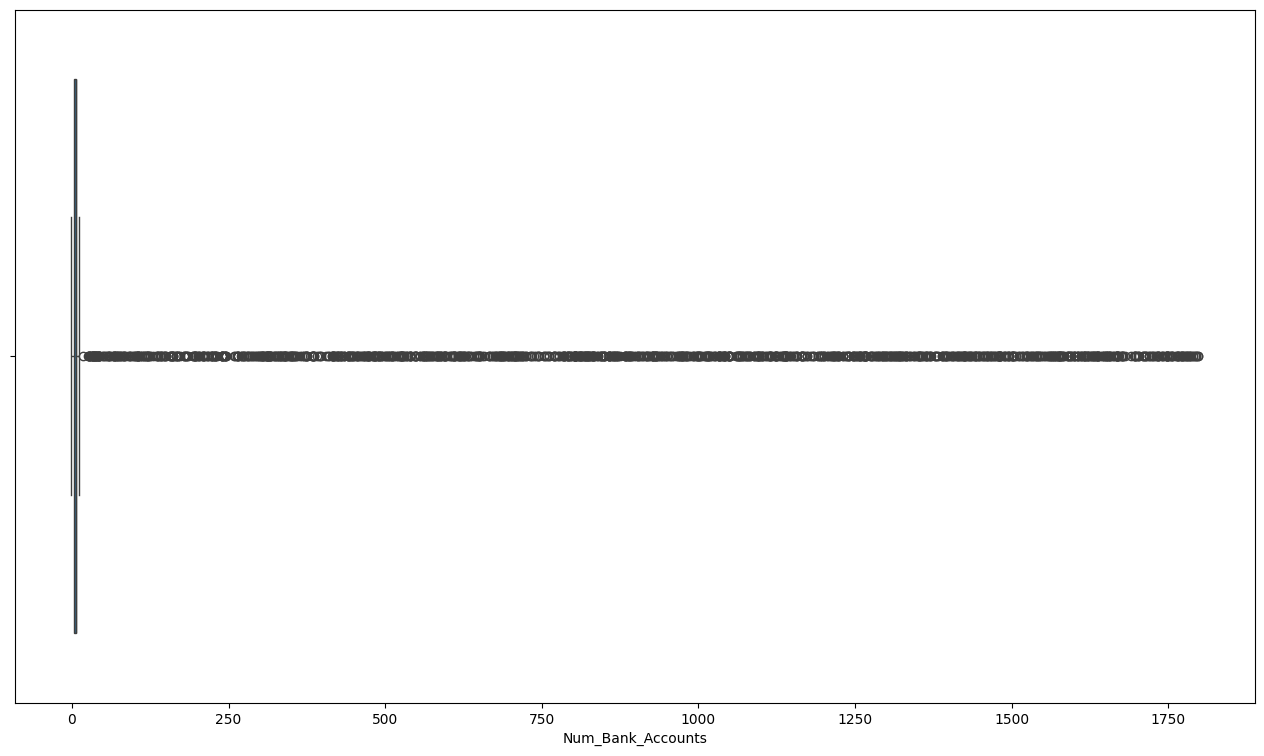

In [ ]:
sns.boxplot(data = data, x = data.Num_Bank_Accounts);

**Interest_Rate**

In [ ]:
non_numeric_values(data, 'Interest_Rate')

set()

In [ ]:
data['Interest_Rate'].value_counts()

Interest_Rate
8       4867
5       4821
6       4595
10      4418
12      4408
        ... 
4995       1
1899       1
5762       1
4372       1
5729       1
Name: count, Length: 1708, dtype: int64

Ini juga masih aman untuk interest rate

**Num_of_Loan**

Nah karena disini tuh ada yang minus, dan gak make sense kita coba delete juga atau drop data yang dibawah 0 (minus)

In [ ]:
non_numeric_values(data, 'Num_of_Loan')

{'-'}

In [ ]:
data['Num_of_Loan'] = pd.to_numeric(data['Num_of_Loan'], errors='coerce')
data[data['Num_of_Loan'] < 0]['Num_of_Loan'].unique()

array([-100])

In [ ]:
data[data['Num_of_Loan'] < 0]['Num_of_Loan'].count()

3771

In [ ]:
data.drop(data[data['Num_of_Loan'] < 0].index, inplace=True)
data.shape

(93453, 21)

<Axes: xlabel='Num_of_Loan'>

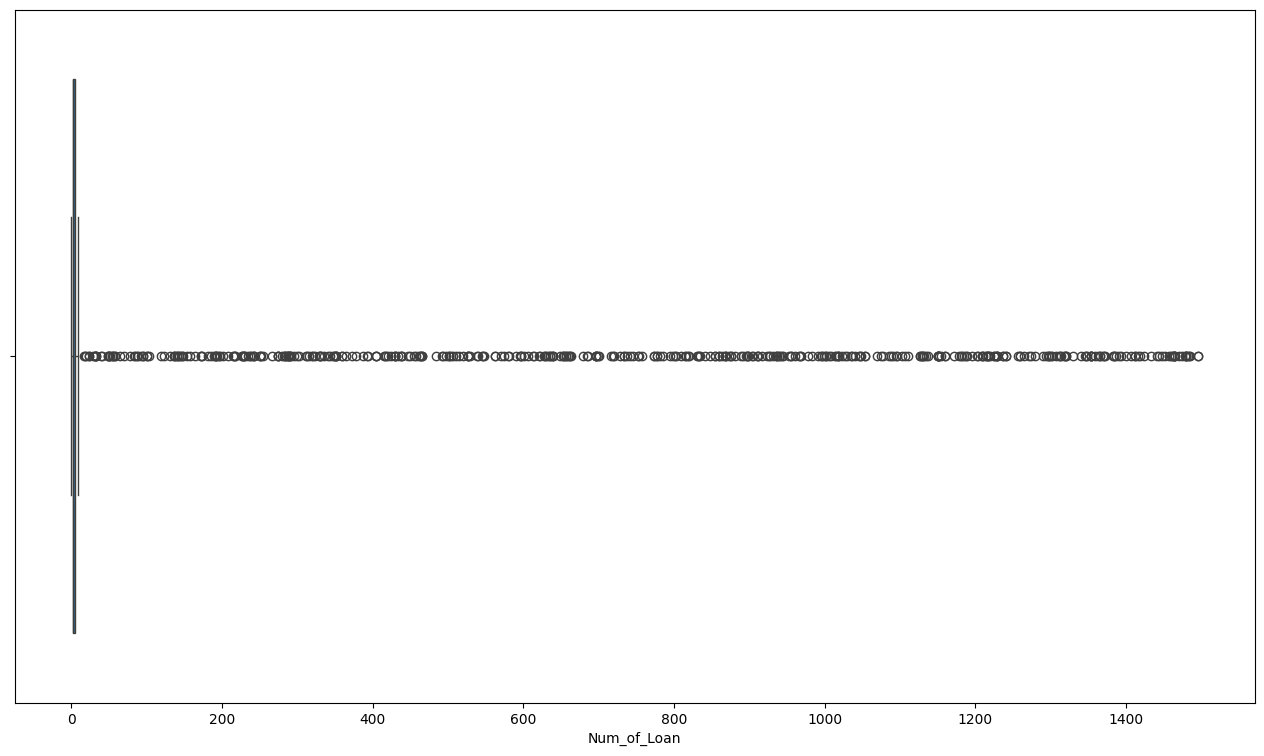

In [ ]:
sns.boxplot(data= data, x = data.Num_of_Loan)

**Delay_from_due_date**

Data ini juga ada yang minus dan gak make sense, makanya datanya akan coba di drop

In [ ]:
non_numeric_values(data, 'Delay_from_due_date')

{'-'}

In [ ]:
data[data['Delay_from_due_date'] < 0]['Delay_from_due_date'].unique()

array([-1, -2, -3, -5, -4])

In [ ]:
data[data['Delay_from_due_date'] < 0]['Delay_from_due_date'].count()

547

In [ ]:
data.drop(data[data['Delay_from_due_date'] < 0].index, inplace=True)
data.shape

(92906, 21)

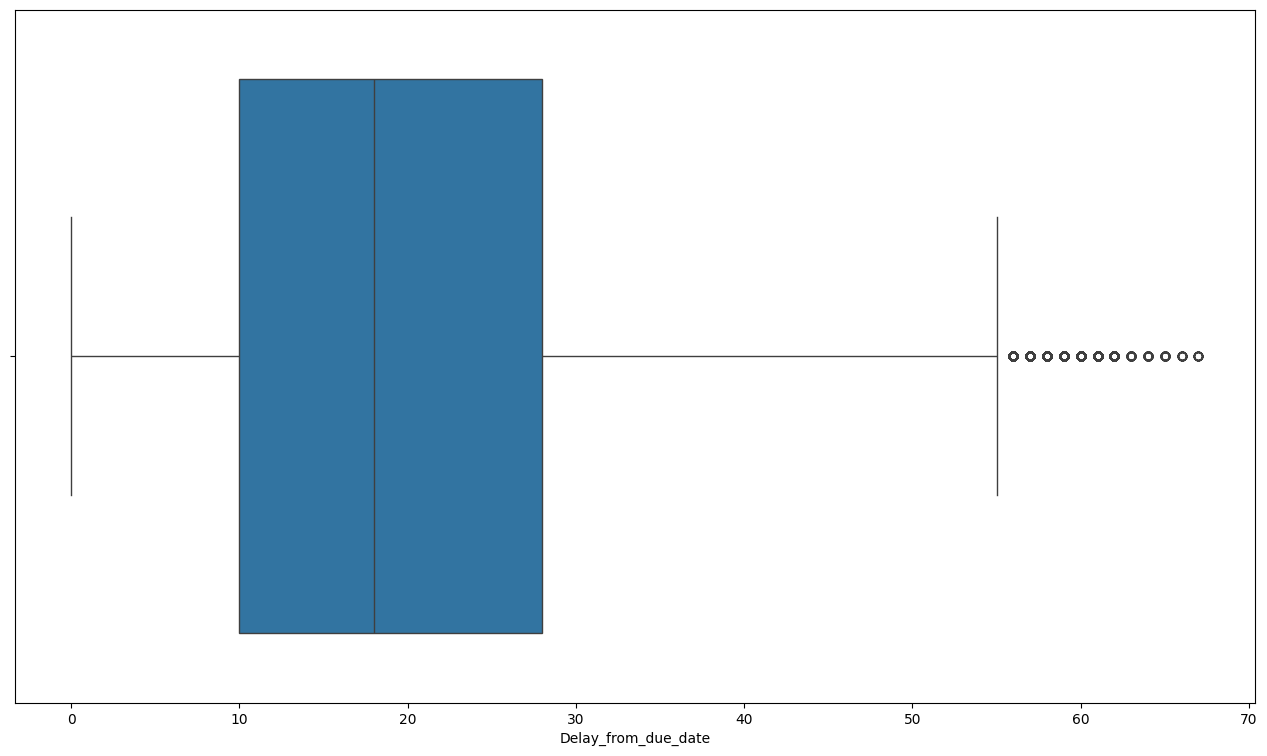

In [ ]:
sns.boxplot(data= data, x = data.Delay_from_due_date);

**Num_of_Delayed_Payment**

In [ ]:
non_numeric_values(data, 'Num_of_Delayed_Payment')

{'-', 'nan'}

In [ ]:
data['Num_of_Delayed_Payment'] = pd.to_numeric(data['Num_of_Delayed_Payment'], errors='coerce')
data[data['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].unique()

array([-1., -3., -2.])

In [ ]:
data[data['Num_of_Delayed_Payment'] < 0]['Num_of_Delayed_Payment'].count()

592

In [ ]:
data.drop(data[data['Num_of_Delayed_Payment'] < 0].index, inplace=True)
data.shape

(92314, 21)

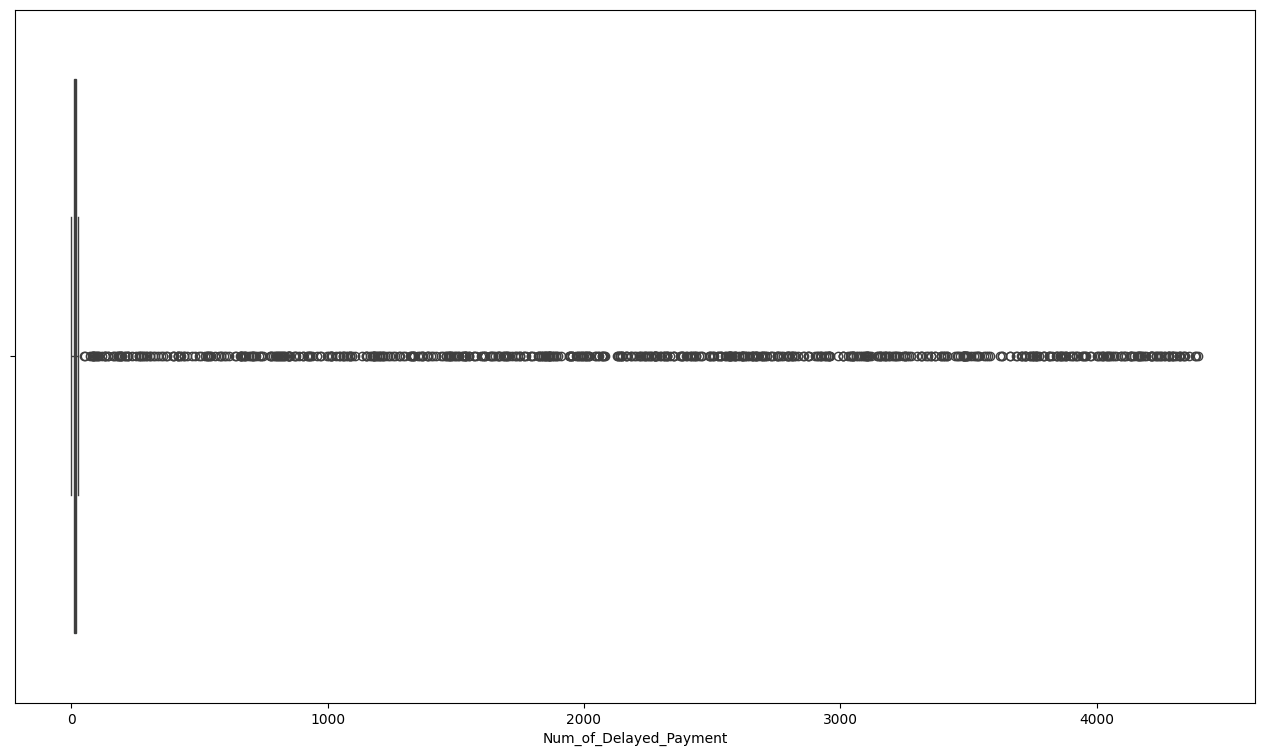

In [ ]:
sns.boxplot(data= data, x = data['Num_of_Delayed_Payment'].dropna());

In [ ]:
data['Num_of_Delayed_Payment'].isna().sum()

6490

Karena masih ada nilai null, makanya kita coba impute nilainya dengan menggunakan imputer

In [ ]:
data['Num_of_Delayed_Payment'].value_counts().head(10)

Num_of_Delayed_Payment
17.0    5080
19.0    5065
16.0    4951
10.0    4941
15.0    4888
18.0    4876
20.0    4761
12.0    4717
9.0     4617
8.0     4520
Name: count, dtype: int64

In [ ]:
from sklearn.impute import KNNImputer

def knn_impute_column(df, column_name, n_neighbors=5):
    """
    Fill missing values in a specific column using KNN imputation.

    Parameters:
    df (DataFrame): The DataFrame containing the column to be imputed.
    column_name (str): The name of the column to be imputed.
    n_neighbors (int): Number of neighbors to consider for imputation. Default is 5.

    Returns:
    DataFrame: The DataFrame with missing values in the specified column imputed.
    """

    # Extract the column to be imputed
    column_to_impute = df[[column_name]]

    # Create an instance of the KNNImputer class
    imputer = KNNImputer(n_neighbors=n_neighbors)

    # Fit and transform the imputer to fill missing values in the column
    column_imputed = imputer.fit_transform(column_to_impute)

    # Replace the original column with the imputed values
    df[column_name] = column_imputed

    return df

In [ ]:
data = knn_impute_column(data, 'Num_of_Delayed_Payment')

In [ ]:
data['Num_of_Delayed_Payment'].isna().sum()

0

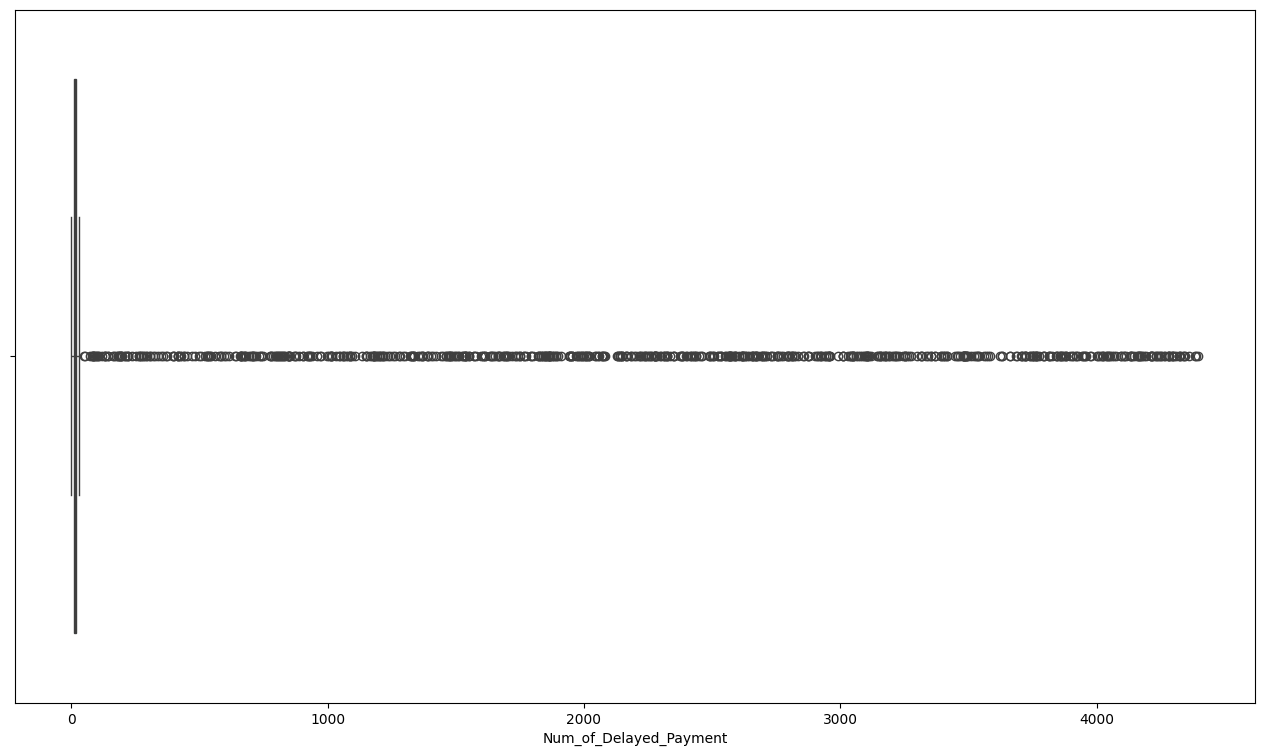

In [ ]:
sns.boxplot(data= data, x = data['Num_of_Delayed_Payment']);

**Monthly_Inhand_Salary**

In [ ]:
# non_numeric_values(data, 'Monthly_Inhand_Salary')

In [ ]:
# data['Monthly_Inhand_Salary'] = pd.to_numeric(data['Monthly_Inhand_Salary'], errors='coerce')
# data[data['Monthly_Inhand_Salary'] < 0]['Monthly_Inhand_Salary'].unique()

In [ ]:
# data[data['Monthly_Inhand_Salary'] < 0]['Monthly_Inhand_Salary'].count()

In [ ]:
# data['Monthly_Inhand_Salary'].value_counts()

In [ ]:
# data['Monthly_Inhand_Salary'].isna().sum()

In [ ]:
# data = knn_impute_column(data, 'Monthly_Inhand_Salary')

In [ ]:
# data['Monthly_Inhand_Salary'].isna().sum()

**Changed Credit Limit**

In [ ]:
# non_numeric_values(data, 'Changed_Credit_Limit')

In [ ]:
# data['Changed_Credit_Limit'] = pd.to_numeric(data['Changed_Credit_Limit'], errors='coerce')
# data[data['Changed_Credit_Limit'] < 0]['Changed_Credit_Limit'].unique()

In [ ]:
# data[data['Changed_Credit_Limit'] < 0]['Changed_Credit_Limit'].count()

In [ ]:
# data.drop(data[data['Changed_Credit_Limit'] < 0].index, inplace=True)
# data.shape

**Num_Credit_Inquiries**

In [ ]:
non_numeric_values(data, 'Num_Credit_Inquiries')

{'.', 'nan'}

In [ ]:
data[data['Num_Credit_Inquiries'] < 0]['Num_Credit_Inquiries'].unique()

array([], dtype=float64)

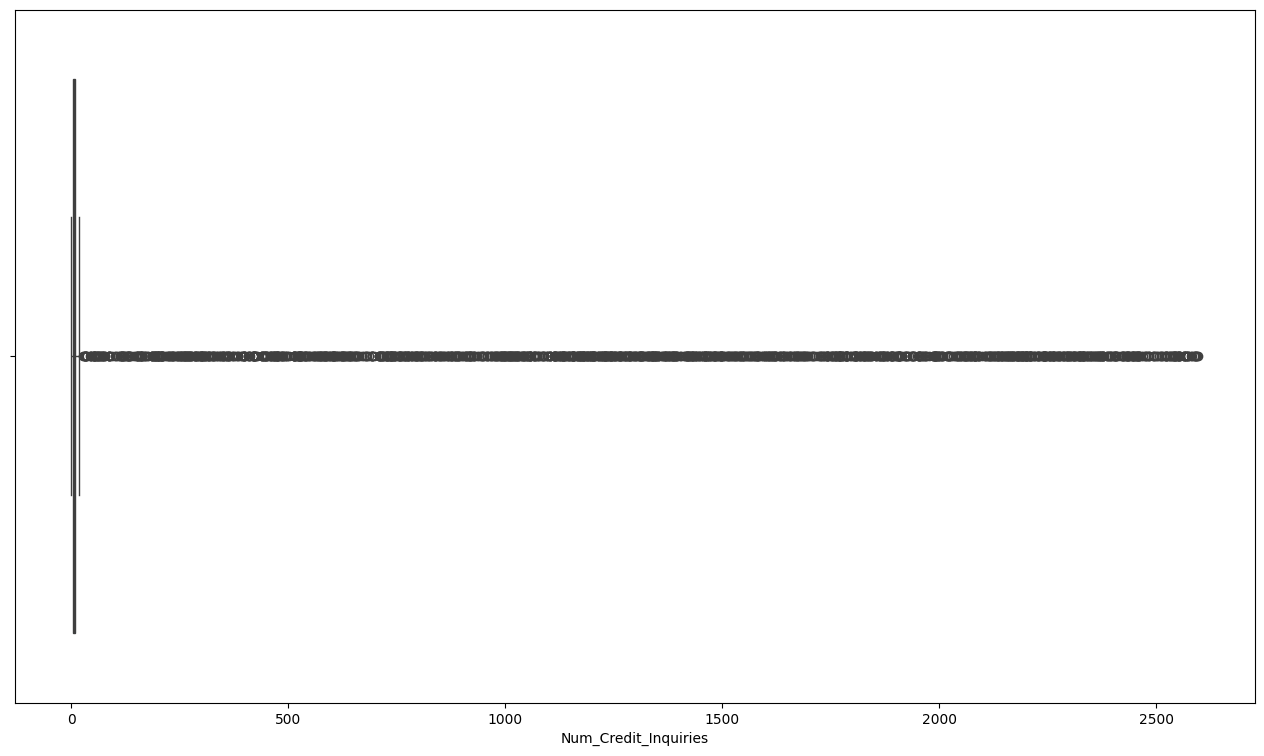

In [ ]:
sns.boxplot(data= data, x = data['Num_Credit_Inquiries'].dropna());

In [ ]:
data['Num_Credit_Inquiries'].isna().sum()

1810

Untuk missing value disini kita coba impute juga supaya tidak null lagi datanya

In [ ]:
data['Num_Credit_Inquiries'].nunique()

1160

In [ ]:
data['Num_Credit_Inquiries'].value_counts().head(10)

Num_Credit_Inquiries
4.0    10314
3.0     8107
6.0     7566
7.0     7516
8.0     7311
2.0     7290
1.0     6896
0.0     6367
5.0     5277
9.0     4932
Name: count, dtype: int64

In [ ]:
data = knn_impute_column(data, 'Num_Credit_Inquiries')
data['Num_Credit_Inquiries'].isna().sum()

0

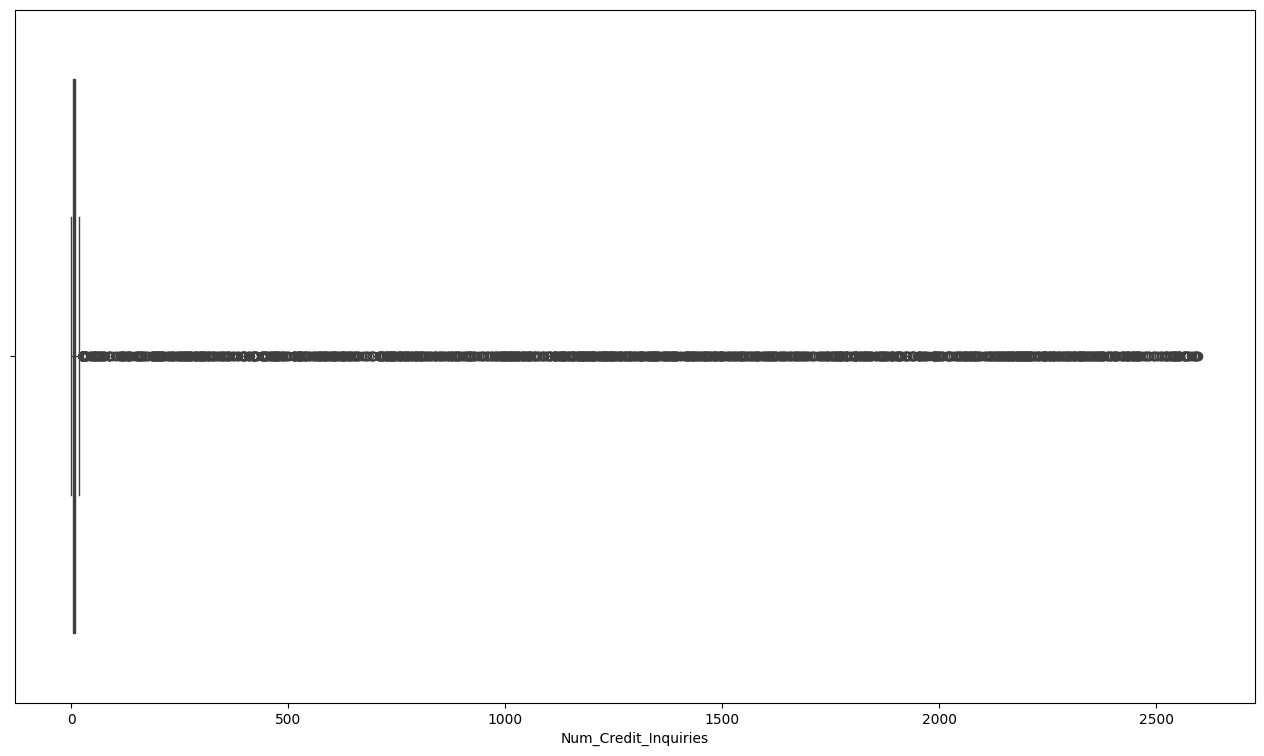

In [ ]:
sns.boxplot(data= data, x = data['Num_Credit_Inquiries']);

**Credit_Mix**

In [ ]:
data['Credit_Mix'].value_counts()

Credit_Mix
Standard    34131
Good        21758
Bad         17755
Name: count, dtype: int64

In [ ]:
data['Credit_Mix'].isna().sum()

18670

In [ ]:
data['Credit_Mix'].fillna('Unknown', inplace=True)
data['Credit_Mix'].astype('object')

0        Unknown
3           Good
4           Good
5           Good
6           Good
          ...   
99995    Unknown
99996    Unknown
99997       Good
99998       Good
99999       Good
Name: Credit_Mix, Length: 92314, dtype: object

In [ ]:
data.Credit_Mix.value_counts()

Credit_Mix
Standard    34131
Good        21758
Unknown     18670
Bad         17755
Name: count, dtype: int64

Disini untuk data yang null kita coba jadikan Unknown saja dan tidak di drop, takutnya juga krusial datanya

**Credit_History_Age**

In [ ]:
data['Credit_History_Age'].value_counts()

Credit_History_Age
15 Years and 11 Months    414
19 Years and 5 Months     408
17 Years and 9 Months     407
19 Years and 3 Months     407
19 Years and 4 Months     406
                         ... 
0 Years and 3 Months       19
33 Years and 7 Months      14
0 Years and 2 Months       13
33 Years and 8 Months      10
0 Years and 1 Months        1
Name: count, Length: 404, dtype: int64

In [ ]:
data['Credit_History_Age'].isna().sum()

8357

In [ ]:
# Group by 'Credit_Mix' and calculate mode for 'Credit_History_Age' within each group
mode_by_credit_mix = data.groupby('Credit_Mix')['Credit_History_Age'].transform(lambda x: x.mode()[0])

# Fill NaN values in 'Credit_History_Age' with the mode for each group
data['Credit_History_Age'].fillna(mode_by_credit_mix, inplace=True)

In [ ]:
data['Credit_History_Age'].isna().sum()

0

In [ ]:
data['Credit_History_Age'].value_counts()

Credit_History_Age
19 Years and 5 Months     3525
30 Years and 2 Months     2204
15 Years and 9 Months     2102
8 Years and 10 Months     1828
15 Years and 11 Months     414
                          ... 
0 Years and 3 Months        19
33 Years and 7 Months       14
0 Years and 2 Months        13
33 Years and 8 Months       10
0 Years and 1 Months         1
Name: count, Length: 404, dtype: int64

Extract supaya ambil years sama month saja

In [ ]:
# Extract years and months from 'Credit_History_Age' column
data['Credit_History_Years'] = data['Credit_History_Age'].str.extract(r'(\d+) Years').astype(int)
data['Credit_History_Months'] = data['Credit_History_Age'].str.extract(r'(\d+) Months?').astype(int)

data.drop(columns=['Credit_History_Age'], inplace=True)

data.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Years,Credit_History_Months
0,1,23,Scientist,19114.12,3,4,3,4,3,7.00000,...,809.98,26.822620,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good,22,1
3,4,23,Scientist,19114.12,3,4,3,4,5,4.00000,...,809.98,31.377862,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,Good,22,4
4,5,23,Scientist,19114.12,3,4,3,4,6,31.19632,...,809.98,24.797347,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,Good,22,5
5,6,23,Scientist,19114.12,3,4,3,4,8,4.00000,...,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,22,6
6,7,23,Scientist,19114.12,3,4,3,4,3,8.00000,...,809.98,22.537593,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,Good,22,7


Setelah itu coba gabungin aja dimana konvert yearnya jadi month terus ditambahi ke dalam monthnya. Ini feature engineering dan menjadi kolom baru

In [ ]:
# Convert years to months and add with months to get total months
data['Credit_History_Age_Months'] = data['Credit_History_Years'] * 12 + data['Credit_History_Months']

# Drop the 'Credit_History_Years' and 'Credit_History_Months' columns
data.drop(columns=['Credit_History_Years', 'Credit_History_Months'], inplace=True)

data.head()

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months
0,1,23,Scientist,19114.12,3,4,3,4,3,7.00000,...,Unknown,809.98,26.822620,No,49.574949,80.41529543900253,HighspentSmallvaluepayments,312.49408867943663,Good,265
3,4,23,Scientist,19114.12,3,4,3,4,5,4.00000,...,Good,809.98,31.377862,No,49.574949,199.4580743910713,LowspentSmallvaluepayments,223.45130972736786,Good,268
4,5,23,Scientist,19114.12,3,4,3,4,6,31.19632,...,Good,809.98,24.797347,No,49.574949,41.420153086217326,HighspentMediumvaluepayments,341.48923103222177,Good,269
5,6,23,Scientist,19114.12,3,4,3,4,8,4.00000,...,Good,809.98,27.262259,No,49.574949,62.430172331195294,!@9#%8,340.4792117872438,Good,270
6,7,23,Scientist,19114.12,3,4,3,4,3,8.00000,...,Good,809.98,22.537593,No,49.574949,178.3440674122349,LowspentSmallvaluepayments,244.5653167062043,Good,271


**Payment_of_Min_Amount**

In [ ]:
data.Payment_of_Min_Amount.value_counts()

Payment_of_Min_Amount
Yes    48966
No     32281
NM     11067
Name: count, dtype: int64

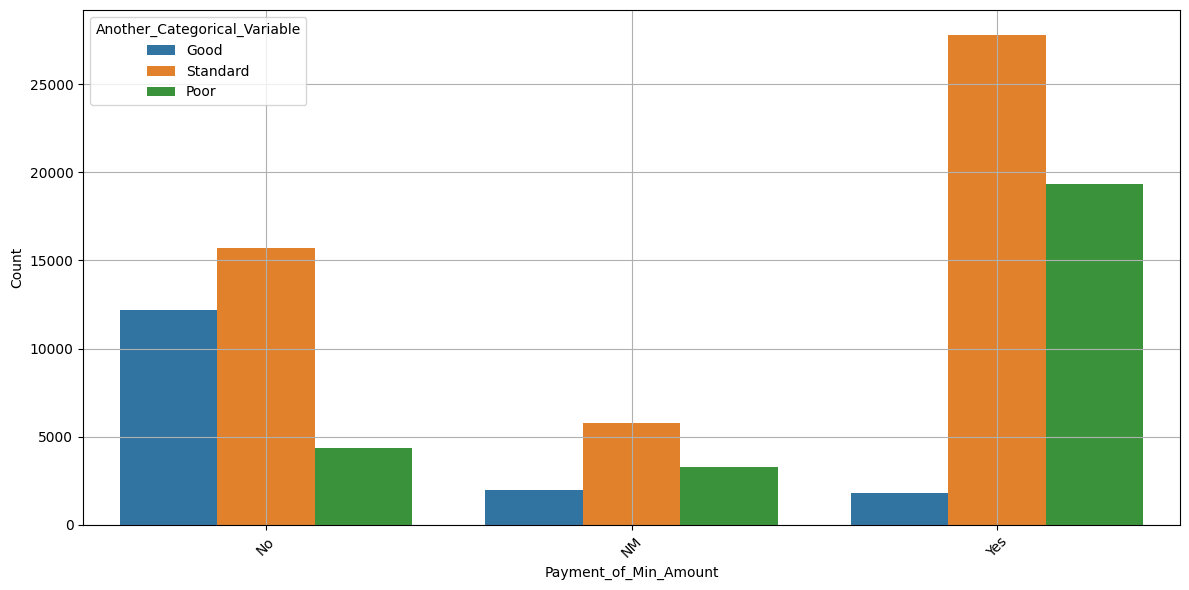

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_of_Min_Amount', hue='Credit_Score', data=data)
plt.xlabel('Payment_of_Min_Amount')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

Datanya masih tergolong aman dan tidak perlu di handle

**Amount_invested_monthly**

In [ ]:
data.Amount_invested_monthly.nunique()

84091

In [ ]:
non_numeric_values(data, 'Amount_invested_monthly')

{'.', 'nan'}

In [ ]:
data['Amount_invested_monthly'].value_counts()

Amount_invested_monthly
10000                 3942
0.0                    154
80.41529543900253        1
143.47816270669819       1
82.08052054492599        1
                      ... 
80.80833460925956        1
91.31117505416927        1
31.997778433084683       1
91.13320596404043        1
167.1638651610451        1
Name: count, Length: 84091, dtype: int64

In [ ]:
data.Amount_invested_monthly.value_counts().head(15)

Amount_invested_monthly
10000                 3942
0.0                    154
80.41529543900253        1
143.47816270669819       1
82.08052054492599        1
145.01575520843969       1
119.76420408559164       1
323.6290674970076        1
108.03608772075752       1
510.8236623011421        1
175.26999891189834       1
51.80228707477197        1
1050.5156287667103       1
153.37445224735526       1
132.19407954925225       1
Name: count, dtype: int64

In [ ]:
data = knn_impute_column(data, 'Amount_invested_monthly')

In [ ]:
data.Amount_invested_monthly.isna().sum()

0

Untuk data yang null atau ada missing value kita coba handle dengan melakukan impute

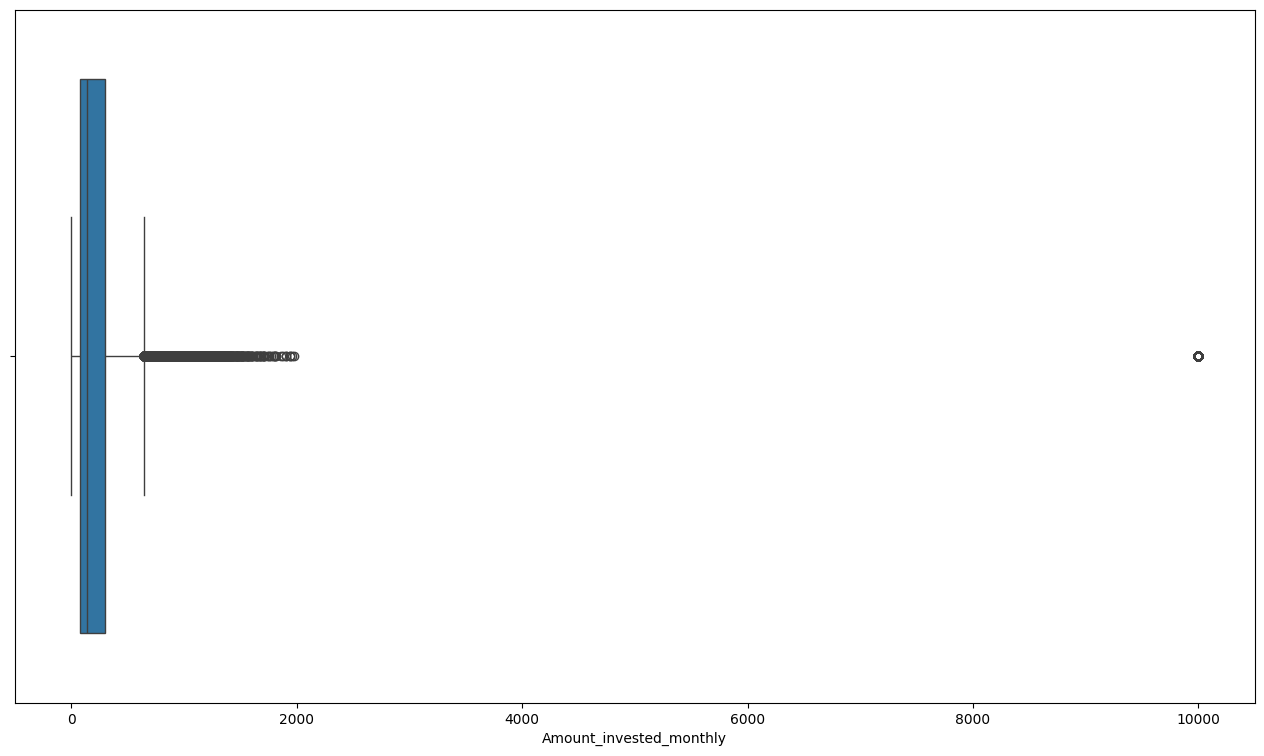

In [ ]:
sns.boxplot(data= data, x = data['Amount_invested_monthly']);

In [ ]:
data[data['Amount_invested_monthly'] == 10000]['Amount_invested_monthly'].count()

3942

**Payment_Behaviour**

In [ ]:
data.Payment_Behaviour.value_counts()

Payment_Behaviour
LowspentSmallvaluepayments      23661
HighspentMediumvaluepayments    16185
LowspentMediumvaluepayments     12779
HighspentLargevaluepayments     12574
HighspentSmallvaluepayments     10471
LowspentLargevaluepayments       9648
!@9#%8                           6996
Name: count, dtype: int64

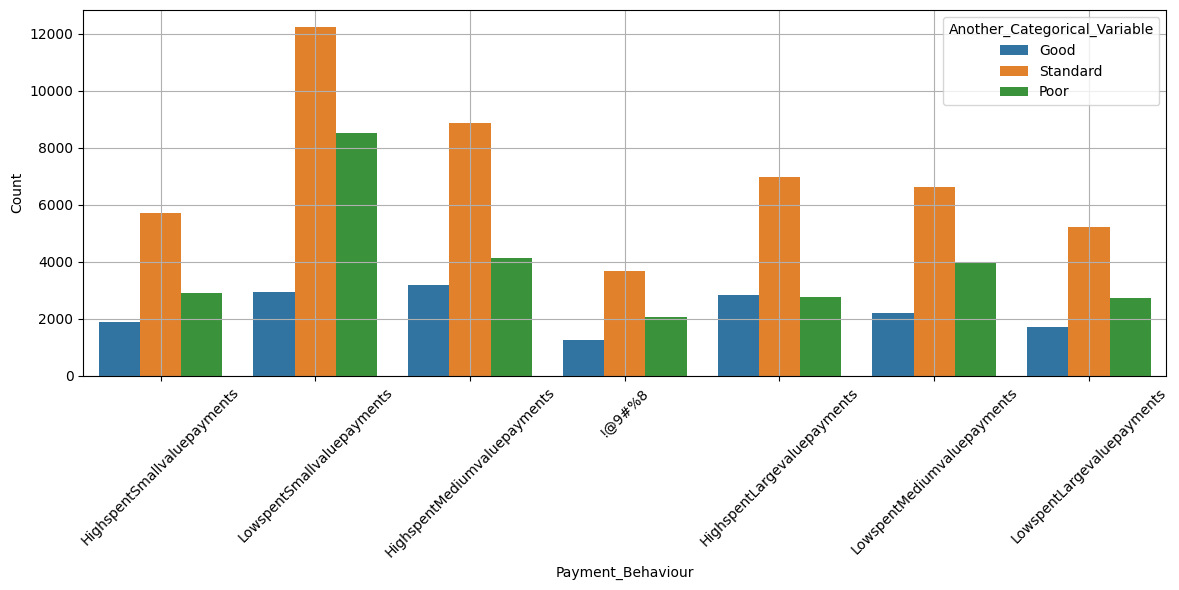

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Payment_Behaviour', hue='Credit_Score', data=data)
plt.xlabel('Payment_Behaviour')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Another_Categorical_Variable')
plt.grid(True)
plt.tight_layout()
plt.show()

Nah disini kalau kita liat ada data yang aneh kan itu kita coba ubah jadi nan terus di fill sama mode

In [ ]:
# Replace '!@9#%8' with NaN
data['Payment_Behaviour'].replace('!@9#%8', pd.NA, inplace=True)

# Impute missing values with mode
mode_value = data['Payment_Behaviour'].mode()[0]
data['Payment_Behaviour'].fillna(mode_value, inplace=True)

In [ ]:
data['Payment_Behaviour'] = data['Payment_Behaviour'].str.replace('Lowspent', 'Low_spent_')
data['Payment_Behaviour'] = data['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')
data['Payment_Behaviour'] = data['Payment_Behaviour'].str.replace('Highspent', 'High_spent_')

data['Payment_Behaviour'] = data['Payment_Behaviour'].str.replace('Smallvalue', 'Small_value_')
data['Payment_Behaviour'] = data['Payment_Behaviour'].str.replace('Largevalue', 'Large_value_')
data['Payment_Behaviour'] = data['Payment_Behaviour'].str.replace('Mediumvalue', 'Medium_value_')

data['Payment_Behaviour'].value_counts()

Payment_Behaviour
Low_spent_Small_value_payments      30657
High_spent_Medium_value_payments    16185
Low_spent_Medium_value_payments     12779
High_spent_Large_value_payments     12574
High_spent_Small_value_payments     10471
Low_spent_Large_value_payments       9648
Name: count, dtype: int64

Terus nama categorynya kita ubah biar lebih terbaca

**Monthly_Balance**

In [ ]:
data.Monthly_Balance.isna().sum()

1123

In [ ]:
non_numeric_values(data, 'Monthly_Balance')

{'-', '.', 'nan'}

In [ ]:
data['Monthly_Balance'] = pd.to_numeric(data['Monthly_Balance'], errors='coerce')
data[data['Monthly_Balance'] < 0]['Monthly_Balance'].count()

9

In [ ]:
data = knn_impute_column(data, 'Monthly_Balance')
data.Monthly_Balance.isna().sum()

0

In [ ]:
data.drop(data[data['Monthly_Balance'] < 0].index, inplace = True)

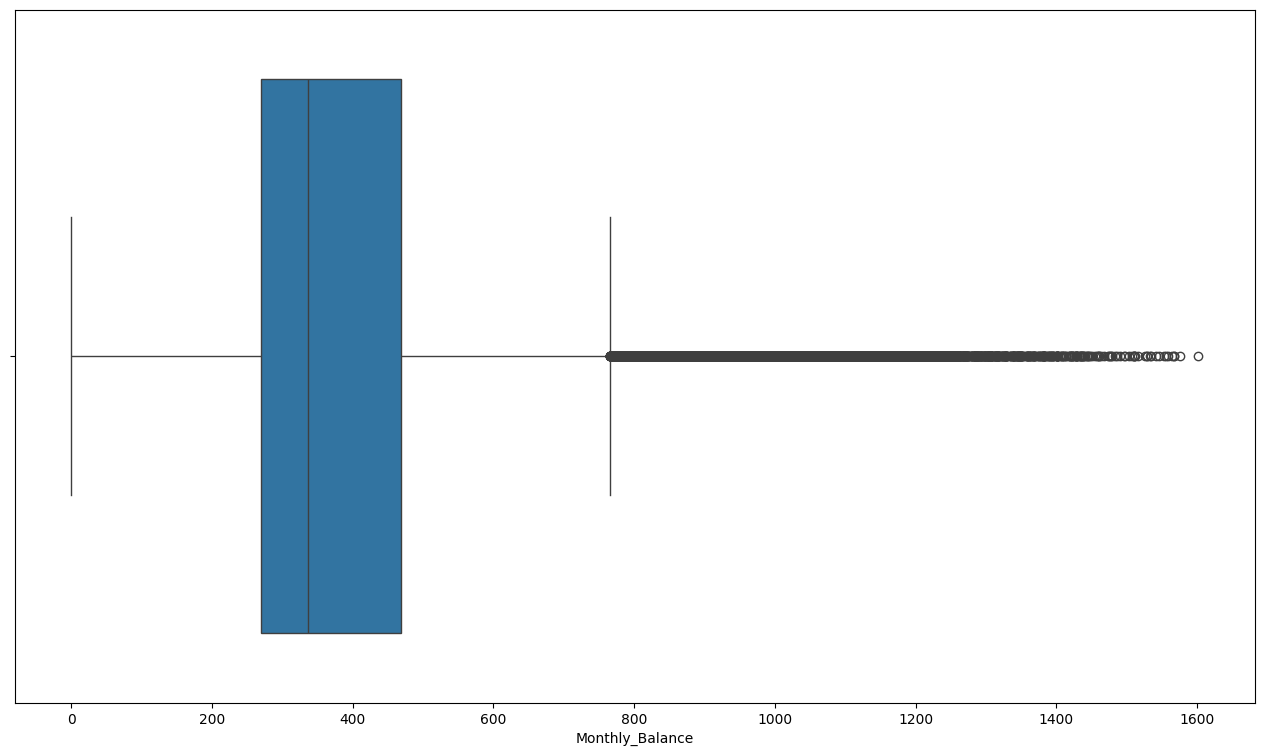

In [ ]:
sns.boxplot(data, x= data['Monthly_Balance']);

### **Change wrong data type**

In [ ]:
data['Annual_Income'] = data['Annual_Income'].astype(float)
data['Outstanding_Debt'] = data['Outstanding_Debt'].astype(float)

data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 91182 entries, 0 to 99999
Data columns (total 21 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Month                      91182 non-null  int64  
 1   Age                        91182 non-null  int64  
 2   Occupation                 91182 non-null  object 
 3   Annual_Income              91182 non-null  float64
 4   Num_Bank_Accounts          91182 non-null  int64  
 5   Num_Credit_Card            91182 non-null  int64  
 6   Interest_Rate              91182 non-null  int64  
 7   Num_of_Loan                91182 non-null  int64  
 8   Delay_from_due_date        91182 non-null  int64  
 9   Num_of_Delayed_Payment     91182 non-null  float64
 10  Num_Credit_Inquiries       91182 non-null  float64
 11  Credit_Mix                 91182 non-null  object 
 12  Outstanding_Debt           91182 non-null  float64
 13  Credit_Utilization_Ratio   91182 non-null  float64


In [ ]:
data['Credit_Score'].value_counts()

Credit_Score
Standard    48725
Poor        26697
Good        15760
Name: count, dtype: int64

## **New Features**

In [ ]:
# Calculate the total number of accounts (Bank Accounts + Credit Cards)

data['Total_Num_Accounts'] = data['Num_Bank_Accounts'] + data['Num_Credit_Card']

# Calculate the total outstanding debt per account

data['Debt_Per_Account'] = data['Outstanding_Debt'] / data['Total_Num_Accounts']

# Calculate the ratio of outstanding debt to annual income

data['Debt_to_Income_Ratio'] = data['Outstanding_Debt'] / data['Annual_Income']

# Calculate the total number of delayed payments per account

data['Delayed_Payments_Per_Account'] = data['Num_of_Delayed_Payment'] / data['Total_Num_Accounts']

# Calculate the total monthly expenses (EMI + Monthly Investments)

# data['Total_Monthly_Expenses'] = data['Total_EMI_per_month'] + data['Amount_invested_monthly']

In [ ]:
data = data[data['Age'] < 60]
data = data[data['Num_Credit_Card'] <= 10]
data = data[data['Interest_Rate'] <= 50]
data = data[data['Num_of_Loan'] <= 12]
data = data[data['Num_Bank_Accounts'] <= 10]
data = data[data['Delay_from_due_date'] <= 60]
# data = data[data['Changed_Credit_Limit'] <= 30]
data = data[data['Num_Credit_Inquiries'] <= 12]
data = data[data['Total_EMI_per_month'] <= 200]
data = data[data['Outstanding_Debt'] <= 1500]

## **Encoding Data**

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
data_numerical = data.select_dtypes(exclude = object)
data_kategorikal = data.select_dtypes(include = object)

encoder = LabelEncoder()

for col in data_kategorikal:
  data[col] = encoder.fit_transform(data[col])

data.head(20)

,Month,Age,Occupation,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,...,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score,Credit_History_Age_Months,Total_Num_Accounts,Debt_Per_Account,Debt_to_Income_Ratio,Delayed_Payments_Per_Account
0,1,23,13,19114.12,3,4,3,4,3,7.00000,...,49.574949,80.415295,2,312.494089,0,265,7,115.711429,0.042376,1.000000
3,4,23,13,19114.12,3,4,3,4,5,4.00000,...,49.574949,199.458074,5,223.451310,0,268,7,115.711429,0.042376,0.571429
4,5,23,13,19114.12,3,4,3,4,6,31.19632,...,49.574949,41.420153,1,341.489231,0,269,7,115.711429,0.042376,4.456617
5,6,23,13,19114.12,3,4,3,4,8,4.00000,...,49.574949,62.430172,5,340.479212,0,270,7,115.711429,0.042376,0.571429
6,7,23,13,19114.12,3,4,3,4,3,8.00000,...,49.574949,178.344067,5,244.565317,0,271,7,115.711429,0.042376,1.142857
7,8,23,13,19114.12,3,4,3,4,3,6.00000,...,49.574949,24.785217,1,358.124168,2,362,7,115.711429,0.042376,0.857143
8,1,28,12,34847.84,2,4,6,1,3,4.00000,...,18.816215,104.291825,5,470.690627,2,319,6,100.838333,0.017362,0.666667
9,2,28,14,34847.84,2,4,6,1,7,1.00000,...,18.816215,40.391238,0,484.591214,0,320,6,100.838333,0.017362,0.166667
11,4,28,14,34847.84,2,4,6,1,3,3.00000,...,18.816215,99.306228,4,465.676224,0,322,6,100.838333,0.017362,0.500000
12,5,28,14,34847.84,2,4,6,1,3,1.00000,...,18.816215,130.115420,5,444.867032,0,323,6,100.838333,0.017362,0.166667


# **Outlier Handling**

<Axes: >

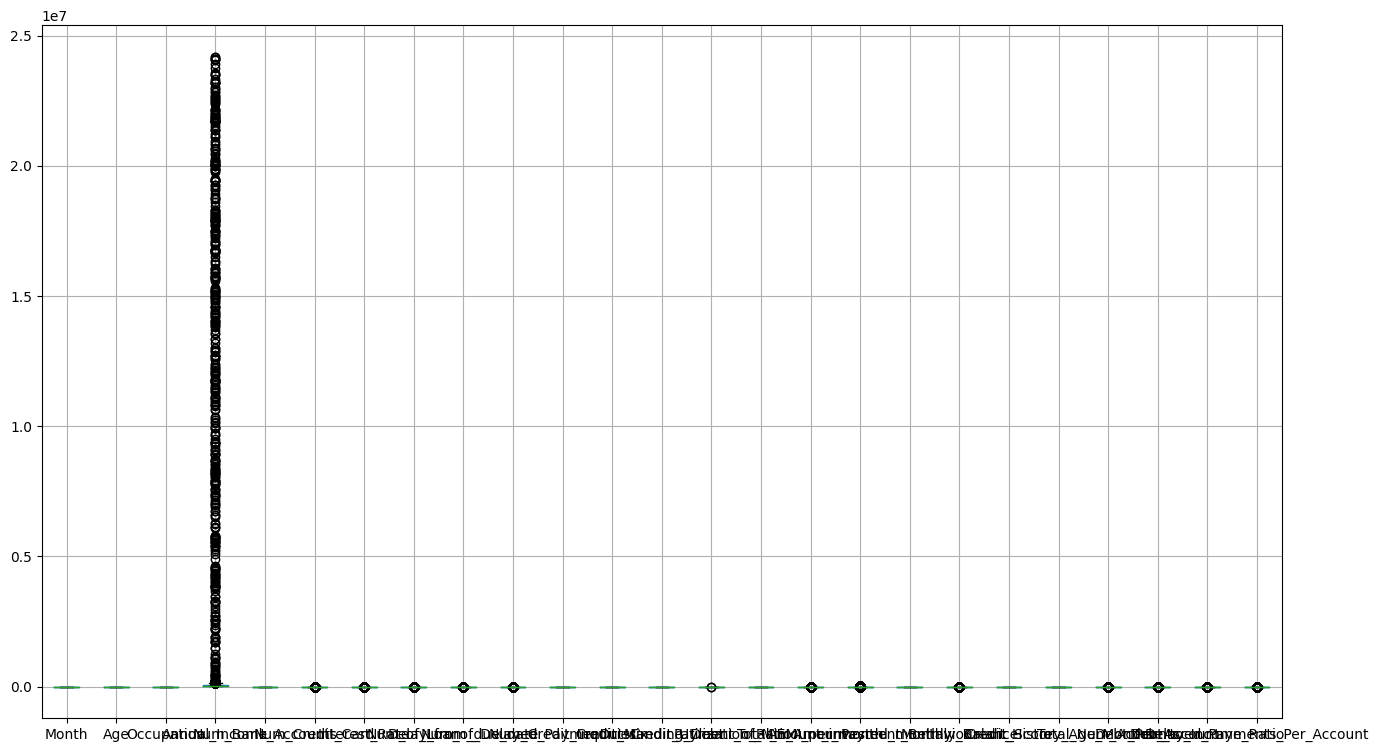

In [ ]:
data.boxplot()

In [ ]:
def outlier_handling(data, feature):
  q1 = data[feature].quantile(0.25)
  q3 = data[feature].quantile(0.75)
  iqr = q3 - q1

  upper = q3 + 1.5 * iqr
  lower = q1 - 1.5 * iqr

  data_clean = data[(data[feature] >= lower) & (data[feature] <= upper)]
  return data_clean

In [ ]:
data = outlier_handling(data, 'Annual_Income')

In [ ]:
for col in data.columns:
  data = outlier_handling(data, col)

<Axes: >

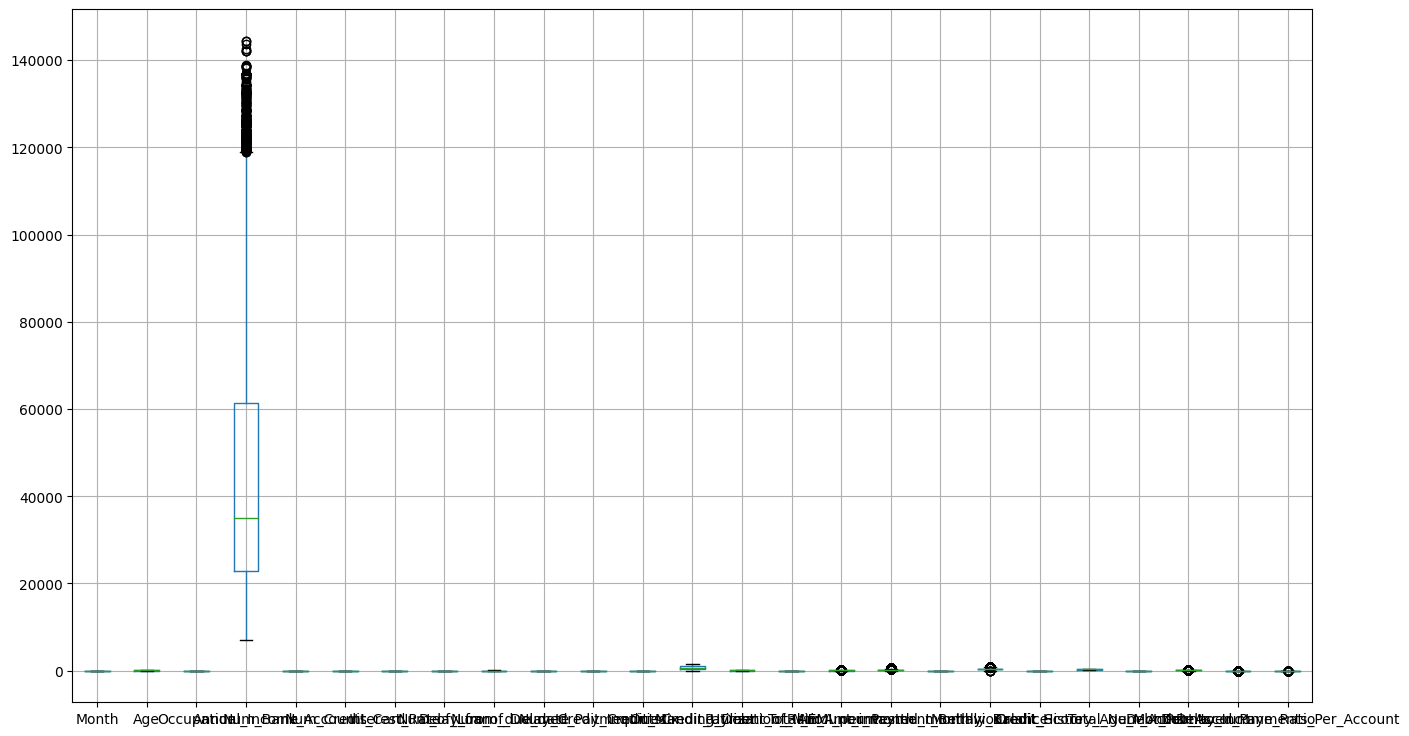

In [ ]:
data.boxplot()

# **Feature Selection**

<Axes: >

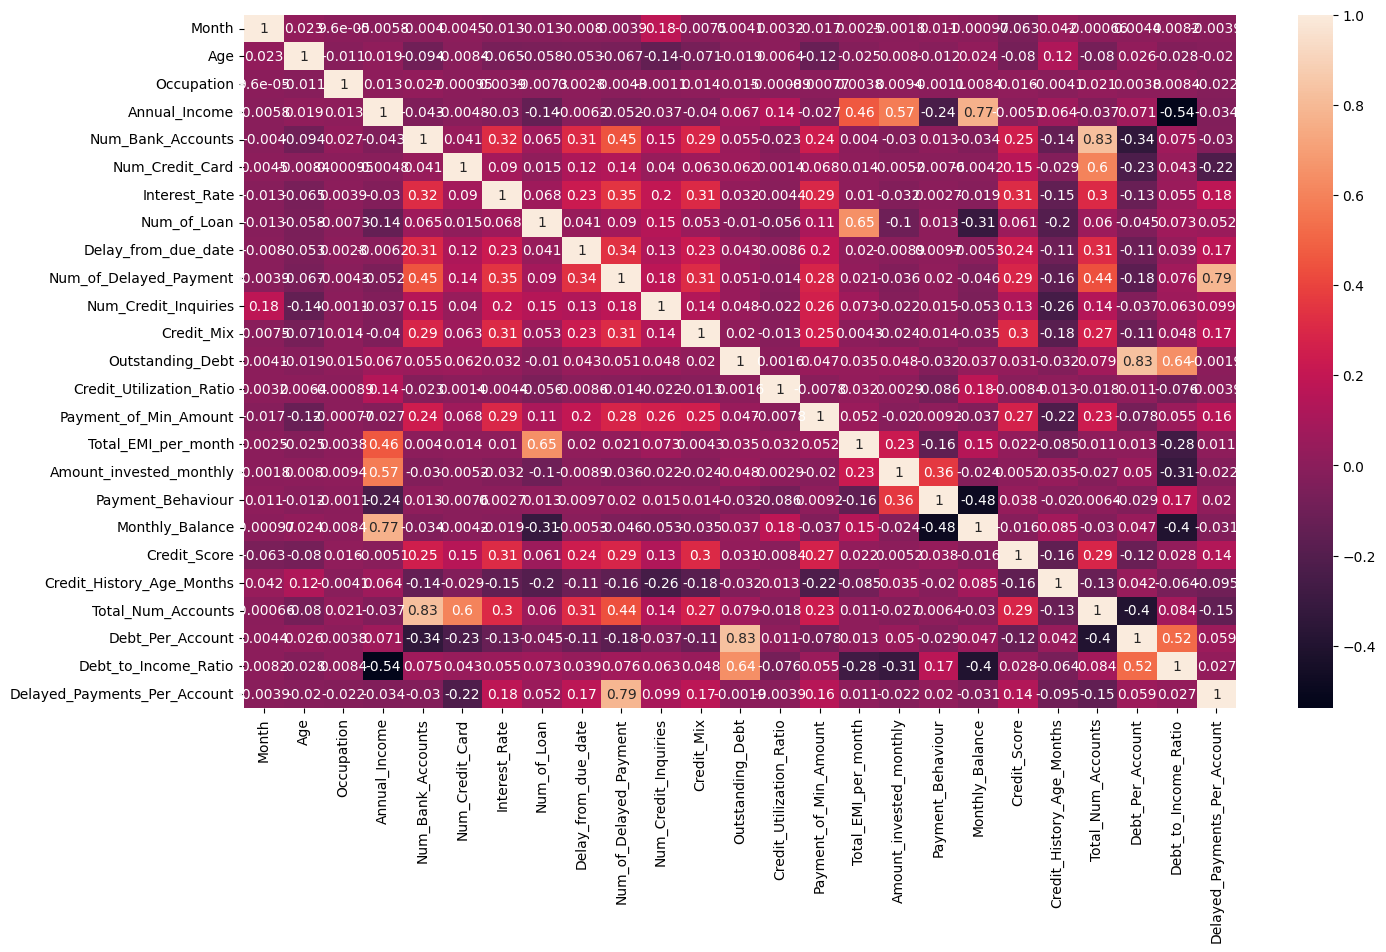

In [ ]:
corr = data.corr()
sns.heatmap(corr, annot = True)

In [ ]:
abs_corr = abs(corr['Credit_Score'])
print(abs_corr.loc[abs_corr != 1].max())

0.3148783847364767


In [ ]:
high_corr = abs_corr[abs_corr > 0]
choosen_feature = [col for col in data.columns if col in high_corr]
print(choosen_feature)

['Month', 'Age', 'Occupation', 'Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card', 'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date', 'Num_of_Delayed_Payment', 'Num_Credit_Inquiries', 'Credit_Mix', 'Outstanding_Debt', 'Credit_Utilization_Ratio', 'Payment_of_Min_Amount', 'Total_EMI_per_month', 'Amount_invested_monthly', 'Payment_Behaviour', 'Monthly_Balance', 'Credit_Score', 'Credit_History_Age_Months', 'Total_Num_Accounts', 'Debt_Per_Account', 'Debt_to_Income_Ratio', 'Delayed_Payments_Per_Account']


# **Build Model**

In [ ]:
X = data[choosen_feature].drop(['Credit_Score'], axis = 1)
Y = data['Credit_Score']

In [ ]:
XTrain, XTest, YTrain, YTest = train_test_split(X, Y, test_size = 0.2, random_state = 42)

In [ ]:
# from imblearn.over_sampling import SMOTE
# sm = SMOTE(random_state=0)
# XTrain, YTrain = sm.fit_resample(XTrain, YTrain)

In [ ]:
Y.value_counts()

Credit_Score
2    18400
0     6566
1     3216
Name: count, dtype: int64

## **Scaling**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
# scaler = StandardScaler()

In [ ]:
# XTrain = scaler.fit_transform(XTrain)
# XTest = scaler.fit_transform(XTest)

## **Random Forest**

In [ ]:
rf = RandomForestClassifier().fit(XTrain, YTrain)
CTest  = rf.predict(XTest)
CTrain  = rf.predict(XTrain)
print("Train set acc: ", accuracy_score(YTrain, CTrain))
print("Test set acc: ", accuracy_score(YTest, CTest))

Train set acc:  1.0
Test set acc:  0.8119567145644847


Report: 
               precision    recall  f1-score   support

           0       0.73      0.72      0.73      1318
           1       0.85      0.45      0.59       646
           2       0.84      0.91      0.87      3673

    accuracy                           0.81      5637
   macro avg       0.80      0.69      0.73      5637
weighted avg       0.81      0.81      0.80      5637



<Axes: >

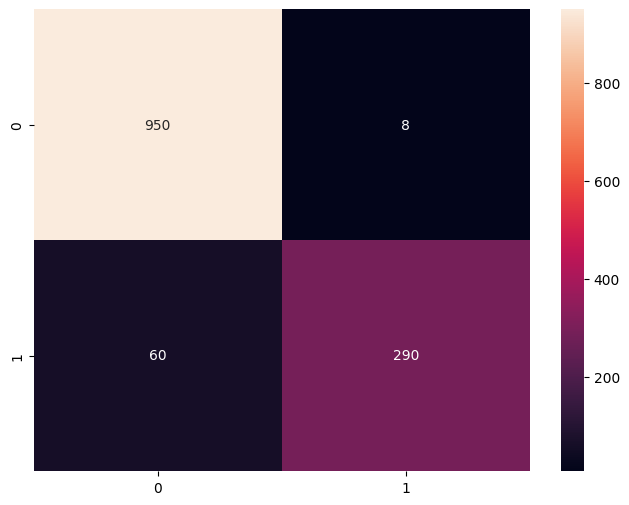

In [ ]:
print("Report: \n", classification_report(YTest, CTest))
plt.figure(figsize=(8, 6))
cm = confusion_matrix(YTest, CTest, labels = [0, 1])
sns.heatmap(cm, annot= True, fmt = "g")

## **Extra Tree**

In [ ]:
ext = ExtraTreesClassifier().fit(XTrain, YTrain)
CTest  = ext.predict(XTest)
CTrain  = ext.predict(XTrain)
print("Train set acc: ", accuracy_score(YTrain, CTrain))
print("Test set acc: ", accuracy_score(YTest, CTest))

Train set acc:  1.0
Test set acc:  0.8233102714209686


Report: 
               precision    recall  f1-score   support

           0       0.76      0.73      0.75      1318
           1       0.86      0.51      0.64       646
           2       0.84      0.91      0.87      3673

    accuracy                           0.82      5637
   macro avg       0.82      0.72      0.75      5637
weighted avg       0.82      0.82      0.82      5637



<Axes: >

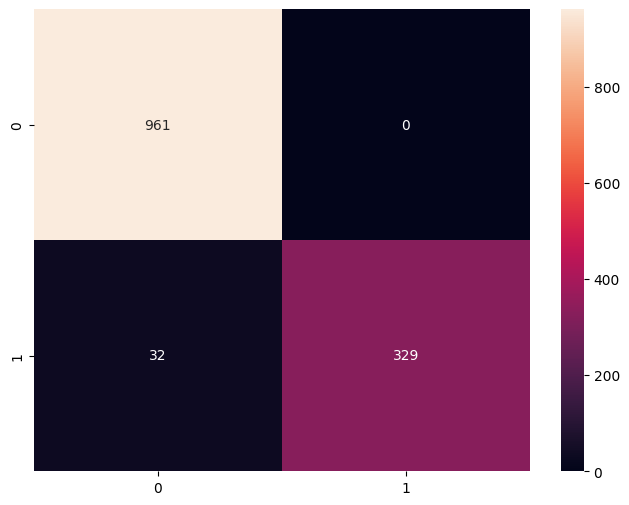

In [ ]:
print("Report: \n", classification_report(YTest, CTest))
plt.figure(figsize=(8, 6))
cm = confusion_matrix(YTest, CTest, labels = [0, 1])
sns.heatmap(cm, annot= True, fmt = "g")

## **GradientBoosting**

In [ ]:
gb = GradientBoostingClassifier().fit(XTrain, YTrain)
CTest  = gb.predict(XTest)
CTrain  = gb.predict(XTrain)
print("Train set acc: ", accuracy_score(YTrain, CTrain))
print("Test set acc: ", accuracy_score(YTest, CTest))

Train set acc:  0.7551119982257707
Test set acc:  0.7456093666844066


Report: 
               precision    recall  f1-score   support

           0       0.60      0.65      0.62      1318
           1       0.68      0.20      0.30       646
           2       0.80      0.88      0.84      3673

    accuracy                           0.75      5637
   macro avg       0.69      0.57      0.59      5637
weighted avg       0.74      0.75      0.73      5637



<Axes: >

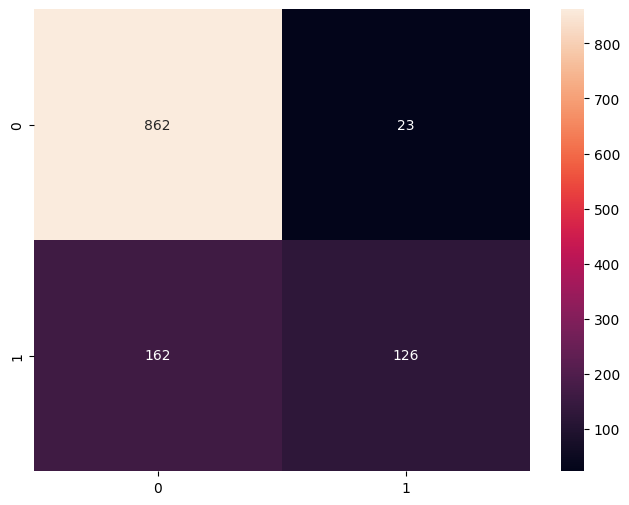

In [ ]:
print("Report: \n", classification_report(YTest, CTest))
plt.figure(figsize=(8, 6))
cm = confusion_matrix(YTest, CTest, labels = [0, 1])
sns.heatmap(cm, annot= True, fmt = "g")

## **XGB**

In [ ]:
xgb = xgb.XGBClassifier().fit(XTrain, YTrain)
CTest  = xgb.predict(XTest)
CTrain  = xgb.predict(XTrain)
print("Train set acc: ", accuracy_score(YTrain, CTrain))
print("Test set acc: ", accuracy_score(YTest, CTest))

Train set acc:  0.941672211133289
Test set acc:  0.8034415469221217


Report: 
               precision    recall  f1-score   support

           0       0.72      0.71      0.71      1318
           1       0.83      0.45      0.58       646
           2       0.83      0.90      0.86      3673

    accuracy                           0.80      5637
   macro avg       0.79      0.69      0.72      5637
weighted avg       0.80      0.80      0.80      5637



<Axes: >

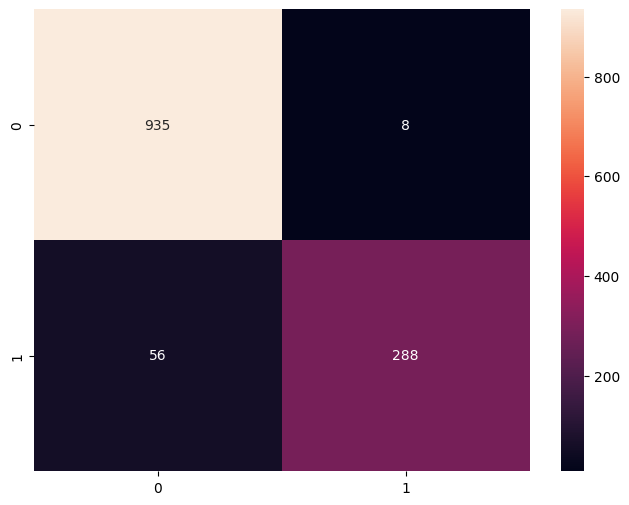

In [ ]:
print("Report: \n", classification_report(YTest, CTest))
plt.figure(figsize=(8, 6))
cm = confusion_matrix(YTest, CTest, labels = [0, 1])
sns.heatmap(cm, annot= True, fmt = "g")

# **Stacking Classifier**

## **Bagging**

In [ ]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier

# Train individual models
rf = RandomForestClassifier().fit(XTrain, YTrain)
ext = ExtraTreesClassifier().fit(XTrain, YTrain)

# Make predictions with individual models
CTest_rf = rf.predict(XTest)
CTrain_rf = rf.predict(XTrain)
CTest_ext = ext.predict(XTest)
CTrain_ext = ext.predict(XTrain)

# Print individual model accuracies
print("RandomForest - Train set acc: ", accuracy_score(YTrain, CTrain_rf))
print("RandomForest - Test set acc: ", accuracy_score(YTest, CTest_rf))
print("ExtraTrees - Train set acc: ", accuracy_score(YTrain, CTrain_ext))
print("ExtraTrees - Test set acc: ", accuracy_score(YTest, CTest_ext))

# Define the meta-model (Logistic Regression)
meta_model = LogisticRegression()

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=[
    ('rf', rf),
    ('ext', ext)
], final_estimator=meta_model, cv=5)

# Train the StackingClassifier
stacking_clf.fit(XTrain, YTrain)

# Make predictions with the StackingClassifier
CTest_stacking = stacking_clf.predict(XTest)
CTrain_stacking = stacking_clf.predict(XTrain)

# Print StackingClassifier accuracies
print("StackingClassifier - Train set acc: ", accuracy_score(YTrain, CTrain_stacking))
print("StackingClassifier - Test set acc: ", accuracy_score(YTest, CTest_stacking))


RandomForest - Train set acc:  1.0
RandomForest - Test set acc:  0.8165690970374313
ExtraTrees - Train set acc:  1.0
ExtraTrees - Test set acc:  0.8210040801844953
StackingClassifier - Train set acc:  1.0
StackingClassifier - Test set acc:  0.831648039737449


## **Boosting**

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier, StackingClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Train individual models
gb = GradientBoostingClassifier().fit(XTrain, YTrain)
xgb = XGBClassifier().fit(XTrain, YTrain)

# Make predictions with individual models
CTest_gb = gb.predict(XTest)
CTrain_gb = gb.predict(XTrain)
CTest_xgb = xgb.predict(XTest)
CTrain_xgb = xgb.predict(XTrain)

# Print individual model accuracies
print("GradientBoosting - Train set acc: ", accuracy_score(YTrain, CTrain_gb))
print("GradientBoosting - Test set acc: ", accuracy_score(YTest, CTest_gb))
print("XGBClassifier - Train set acc: ", accuracy_score(YTrain, CTrain_xgb))
print("XGBClassifier - Test set acc: ", accuracy_score(YTest, CTest_xgb))

# Define the meta-model (Logistic Regression)
meta_model = GradientBoostingClassifier()

# Create the StackingClassifier
stacking_clf = StackingClassifier(estimators=[
    ('gb', gb),
    ('xgb', xgb)
], final_estimator=meta_model, cv=5)

# Train the StackingClassifier
stacking_clf.fit(XTrain, YTrain)

# Make predictions with the StackingClassifier
CTest_stacking = stacking_clf.predict(XTest)
CTrain_stacking = stacking_clf.predict(XTrain)

# Print StackingClassifier accuracies
print("StackingClassifier - Train set acc: ", accuracy_score(YTrain, CTrain_stacking))
print("StackingClassifier - Test set acc: ", accuracy_score(YTest, CTest_stacking))

GradientBoosting - Train set acc:  0.7551119982257707
GradientBoosting - Test set acc:  0.7457867660102891
XGBClassifier - Train set acc:  0.941672211133289
XGBClassifier - Test set acc:  0.8034415469221217
StackingClassifier - Train set acc:  0.94868041694389
StackingClassifier - Test set acc:  0.8178108923186092


# **Hyperparameter Tuning**

## **Grid Search**

### **Random Forest**

In [ ]:
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Inisialisasi RandomForestClassifier
# rf = RandomForestClassifier()

# # Inisialisasi GridSearchCV
# grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring='accuracy')

# # Melakukan grid search pada data latih
# grid_search.fit(XTrain, YTrain)

# # Menampilkan parameter terbaik
# print("Parameter terbaik:", grid_search.best_params_)

# # Menggunakan model terbaik
# best_rf = grid_search.best_estimator_

# # Melakukan prediksi pada data latih dan data uji
# CTest = best_rf.predict(XTest)
# CTrain = best_rf.predict(XTrain)

# # Menampilkan akurasi
# print("Train set acc: ", accuracy_score(YTrain, CTrain))
# print("Test set acc: ", accuracy_score(YTest, CTest))

# Extra Trees

In [ ]:
# param_grid_et = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [None, 10, 20],
#     'min_samples_split': [2, 5, 10],
#     'min_samples_leaf': [1, 2, 4]
# }

# # Inisialisasi ExtraTreesClassifier
# ext = ExtraTreesClassifier()

# # Inisialisasi GridSearchCV
# grid_search_et = GridSearchCV(estimator=ext, param_grid=param_grid_et, cv=5, scoring='accuracy')

# # Melakukan grid search pada data latih
# grid_search_et.fit(XTrain, YTrain)

# # Menampilkan parameter terbaik
# print("Parameter terbaik untuk Extra Trees:", grid_search_et.best_params_)

# # Menggunakan model terbaik
# best_et = grid_search_et.best_estimator_

# # Melakukan prediksi pada data latih dan data uji
# CTest_et = best_et.predict(XTest)
# CTrain_et = best_et.predict(XTrain)

# # Menampilkan akurasi
# print("Train set acc (Extra Trees): ", accuracy_score(YTrain, CTrain_et))
# print("Test set acc (Extra Trees): ", accuracy_score(YTest, CTest_et))


# Gradient Boosting

In [ ]:
# param_grid_gb = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0]
# }

# # Inisialisasi GradientBoostingClassifier
# gb = GradientBoostingClassifier()

# # Inisialisasi GridSearchCV
# grid_search_gb = GridSearchCV(estimator=gb, param_grid=param_grid_gb, cv=5, scoring='accuracy')

# # Melakukan grid search pada data latih
# grid_search_gb.fit(XTrain, YTrain)

# # Menampilkan parameter terbaik
# print("Parameter terbaik untuk Gradient Boosting:", grid_search_gb.best_params_)

# # Menggunakan model terbaik
# best_gb = grid_search_gb.best_estimator_

# # Melakukan prediksi pada data latih dan data uji
# CTest_gb = best_gb.predict(XTest)
# CTrain_gb = best_gb.predict(XTrain)

# # Menampilkan akurasi
# print("Train set acc (Gradient Boosting): ", accuracy_score(YTrain, CTrain_gb))
# print("Test set acc (Gradient Boosting): ", accuracy_score(YTest, CTest_gb))


# XGBoost

In [ ]:
# param_grid_xgb = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [3, 5, 7],
#     'learning_rate': [0.01, 0.1, 0.2],
#     'subsample': [0.8, 1.0]
# }

# # Inisialisasi XGBClassifier
# xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')

# # Inisialisasi GridSearchCV
# grid_search_xgb = GridSearchCV(estimator=xgb, param_grid=param_grid_xgb, cv=5, scoring='accuracy')

# # Melakukan grid search pada data latih
# grid_search_xgb.fit(XTrain, YTrain)

# # Menampilkan parameter terbaik
# print("Parameter terbaik untuk XGBoost:", grid_search_xgb.best_params_)

# # Menggunakan model terbaik
# best_xgb = grid_search_xgb.best_estimator_

# # Melakukan prediksi pada data latih dan data uji
# CTest_xgb = best_xgb.predict(XTest)
# CTrain_xgb = best_xgb.predict(XTrain)

# # Menampilkan akurasi
# print("Train set acc (XGBoost): ", accuracy_score(YTrain, CTrain_xgb))
# print("Test set acc (XGBoost): ", accuracy_score(YTest, CTest_xgb))


# Feature Importance

                         feature  importance
0                     Credit_Mix    0.518784
1          Payment_of_Min_Amount    0.060720
2                Num_Credit_Card    0.053349
3            Delay_from_due_date    0.042240
4                          Month    0.041212
5                  Interest_Rate    0.038302
6         Num_of_Delayed_Payment    0.033692
7              Num_Bank_Accounts    0.024329
8               Debt_Per_Account    0.017149
9                  Annual_Income    0.017031
10              Outstanding_Debt    0.015613
11            Total_Num_Accounts    0.015360
12          Debt_to_Income_Ratio    0.015125
13             Payment_Behaviour    0.013032
14           Total_EMI_per_month    0.012653
15  Delayed_Payments_Per_Account    0.011976
16     Credit_History_Age_Months    0.010995
17                    Occupation    0.009241
18          Num_Credit_Inquiries    0.009217
19       Amount_invested_monthly    0.009162
20                           Age    0.008979
21        

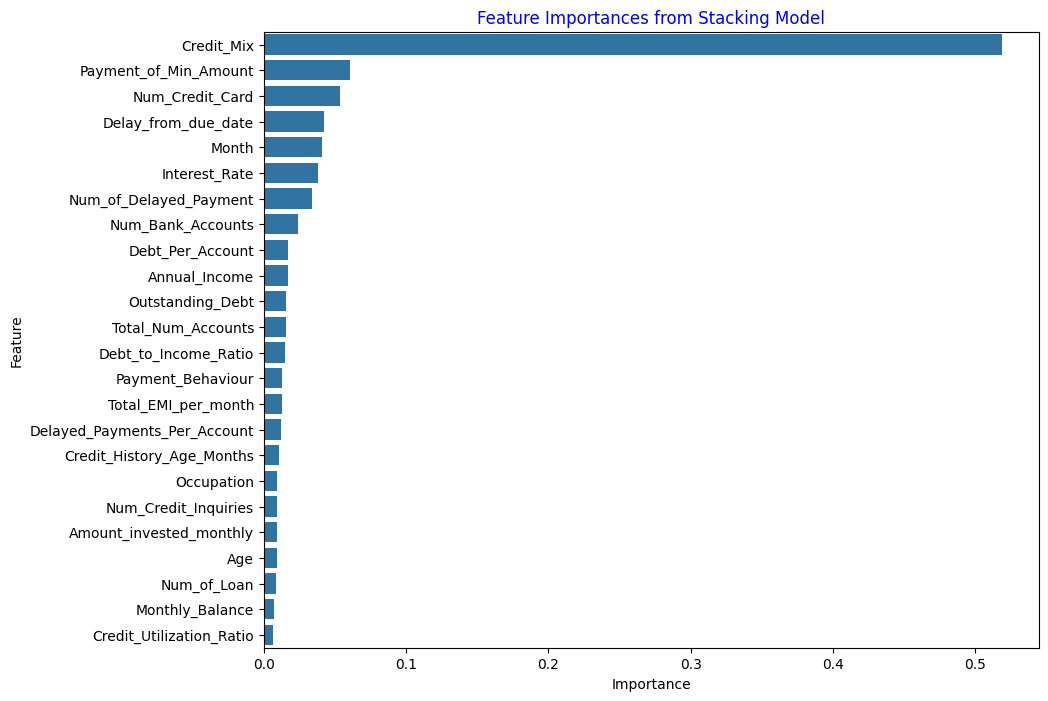

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.ensemble import StackingClassifier

# Assuming stacking_clf is already fitted
stacking_clf.fit(X, Y)

# Extract feature importances from each base model
base_importances = []

for name, model in stacking_clf.estimators:
    if hasattr(model, 'feature_importances_'):
        base_importances.append(model.feature_importances_)
    else:
        print(f"Model {name} does not have feature_importances_ attribute")

# Average the importances
if base_importances:
    avg_importances = np.mean(base_importances, axis=0)

    # Create a DataFrame with feature names and their importances
    feature_importance_df = pd.DataFrame({
        'feature': X.columns,
        'importance': avg_importances
    })

    # Drop features with zero importance
    feature_importance_df = feature_importance_df[feature_importance_df['importance'] > 0]

    # Sort the DataFrame in descending order
    feature_importance_df.sort_values(by='importance', ascending=False, inplace=True)

    feature_importance_df.reset_index(drop=True, inplace=True)

    # Display the DataFrame
    print(feature_importance_df)

    # Plot the feature importances
    plt.figure(figsize=(10, 8))
    plt.title('Feature Importances from Stacking Model', color='blue')
    sns.barplot(y='feature', x='importance', data=feature_importance_df)
    plt.xlabel('Importance')
    plt.ylabel('Feature')
    plt.show()
else:
    print("None of the base models have feature_importances_ attribute")
